In [175]:
import pyspssio as ps
import pandas as pd
import numpy as np

In [176]:
from linearmodels import PanelOLS

In [177]:
data={}
meta_df={}
resp=[]
for i in range(5,32):
    df, meta = ps.read_sav(f"{i}wave.sav")
    data[i]=df
    meta_df[i]=meta
    
    if i==5:
        resp = set(df["idind"])
    else:
        resp = resp & set(df["idind"])
        
for i in range(5,32):
    #убрать комментарий, если хочется, чтобы были только одинаковые персонажи
    #data[i] = data[i].loc[data[i]['idind'].isin(resp)]
    data[i]["wave"] = [i]*len(data[i])

C:\Users\1\AppData\Local\Temp\ipykernel_6548\1547953882.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\1\AppData\Local\Temp\ipykernel_6548\1547953882.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\1\AppData\Local\Temp\ipykernel_6548\1547953882.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `

In [178]:
del df

In [179]:
meta_df[12]

{'file_attributes': {},
 'encoding': 'windows-1251',
 'case_count': 12656,
 'case_weight_var': '',
 'mrsets': {},
 'var_names': ['idind',
  'hredid_i',
  'hid_i',
  'hid_h',
  'gid_i',
  'gid_h',
  'fid_i',
  'fid_h',
  'eid_i',
  'eid_h',
  'did_i',
  'did_h',
  'cid_i',
  'cid_h',
  'bid_i',
  'bid_h',
  'aid_i',
  'aid_h',
  'h_origsm',
  'h_inwgt',
  'psu',
  'region',
  'ssu',
  'status',
  'popul',
  'h_int_y',
  'h_born_y',
  'h_adult',
  'h_child',
  'h_marst',
  'h_occup08',
  'h_educ',
  'h_diplom',
  'h_diplom_1',
  'site',
  'hh3',
  'hh4',
  'hh4.1',
  'hh5',
  'h_born_m',
  'h_age',
  'hh6',
  'hh7.1',
  'hh7.2',
  'hh8a',
  'hh8b',
  'hi1',
  'hi2',
  'hi3',
  'hi3.1',
  'hi4',
  'hi5',
  'hi6',
  'hj1',
  'hj1.1.1',
  'hj1.1.2',
  'hj1.1.3',
  'hj1.1.4',
  'hj1.1.5',
  'hj2cod08',
  'hj5a',
  'hj5b',
  'hj6',
  'hj6.0',
  'hj6.1a',
  'hj6.1b',
  'hj6.2',
  'hj7',
  'hj8',
  'hj9',
  'hj10',
  'hj11',
  'hj11.1',
  'hj11.2',
  'hj13',
  'hj13.2',
  'hj14',
  'hj15',
  'h

In [180]:
#буквы соответсвуют номерам волн: a - 5, b - 6 и тд
alphabet = [chr(i) for i in range(97, 123)]
alphabet.append("aa")
alphabet = dict(zip(list(range(5,32)),alphabet))

In [181]:
data[12]

,idind,hredid_i,hid_i,hid_h,gid_i,gid_h,fid_i,fid_h,eid_i,eid_h,...,hm102,hm103,hm104,hm105,hm106,hm107,hm108,hm109,hm111,wave
0,1.0,135101.0,1010101.0,10101.0,1010101.0,10101.0,1010101.0,10101.0,1010101.0,10101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
1,2.0,135102.0,1010102.0,10101.0,1010102.0,10101.0,1010102.0,10101.0,1010102.0,10101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
2,3.0,135201.0,1010201.0,10102.0,1010201.0,10102.0,1010201.0,10102.0,1010201.0,10102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
3,6.0,135204.0,1010204.0,10102.0,1010204.0,10102.0,1010204.0,10102.0,1010204.0,10102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
4,7.0,135301.0,1010301.0,10103.0,1010301.0,10103.0,1010301.0,10103.0,1010301.0,10103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12651,22779.0,401202.0,241161102.0,2411611.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
12652,22780.0,400701.0,241161901.0,2411619.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
12653,24960.0,463604.0,240232104.0,2402321.0,240232104.0,2402321.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,12
12654,47964.0,463701.0,240232701.0,2402327.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


In [182]:
#,"j130.1","j130.2","j130.3","j130.4","j122.1","j122.2","j122.3", "j122.4","j122.5","j122.6"
panel = pd.DataFrame()
panel_wave = pd.DataFrame()
variables = ["hid_h" ,'region',"idind","wave",'popul',"h5","_age"
             ,"j60","_marst","_educ","j119.1","j119.2",
            "j119.3","j120","j121.1","j121.2","j121.5","j1", 'j10', 
             'n5', 'j6.1a','j2cod08',"j69" ]#переменные записывать дальше

i_min=12
i_max=13
for i in range(i_min,i_max):

    variables_wave = variables.copy()
    
    for j in range(len(variables)):
        #variables_wave = variables
        if j>4:
            variables_wave[j]=alphabet[i]+variables_wave[j]
    
    if i==i_min:
        panel[variables] = data[i][variables_wave]
    else:
        panel_wave[variables] = data[i][variables_wave]
        panel = pd.concat([panel, panel_wave])

In [183]:
panel.isna().mean()

hid_h      0.000000
region     0.000000
idind      0.000000
wave       0.000000
popul      0.000000
h5         0.000000
_age       0.000000
j60        0.159608
_marst     0.159687
_educ      0.159608
j119.1     0.159608
j119.2     0.159608
j119.3     0.159608
j120       0.159608
j121.1     0.159608
j121.2     0.159608
j121.5     0.159608
j1         0.159608
j10        0.622155
n5         0.757190
j6.1a      0.564949
j2cod08    0.564949
j69        0.159608
dtype: float64

In [184]:
panel

,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j120,j121.1,j121.2,j121.5,j1,j10,n5,j6.1a,j2cod08,j69
0,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.00,2.0,21.0,...,2.0,2.0,2.0,2.0,2.0,10700.00,1.0,4.0,2341.0,1.0
1,10101.0,1.0,2.0,12,10800.0,1.0,32.0,8500.00,2.0,16.0,...,2.0,2.0,2.0,99999997.0,1.0,8500.00,NaN,8.0,7422.0,2.0
2,10102.0,1.0,3.0,12,10800.0,2.0,48.0,3518.00,3.0,16.0,...,2.0,2.0,3.0,2.0,1.0,2600.00,1.0,99999997.0,9111.0,3.0
3,10102.0,1.0,6.0,12,10800.0,1.0,17.0,0.00,1.0,14.0,...,2.0,3.0,2.0,3.0,5.0,NaN,NaN,NaN,NaN,2.0
4,10103.0,1.0,7.0,12,10800.0,2.0,59.0,3766.62,1.0,10.0,...,2.0,2.0,2.0,2.0,1.0,2217.62,NaN,6.0,3412.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12651,2411611.0,141.0,22779.0,12,4952300.0,1.0,19.0,5000.00,1.0,18.0,...,2.0,2.0,1.0,1.0,1.0,5000.00,NaN,8.0,7123.0,1.0
12652,2411619.0,141.0,22780.0,12,4952300.0,1.0,28.0,18000.00,4.0,20.0,...,1.0,2.0,3.0,2.0,1.0,18000.00,NaN,24.0,5414.0,2.0
12653,2402321.0,138.0,24960.0,12,8881200.0,1.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12654,2402327.0,138.0,47964.0,12,8881200.0,2.0,66.0,8000.00,5.0,21.0,...,2.0,2.0,99999997.0,2.0,1.0,6000.00,NaN,6.0,2310.0,3.0


НОВЫЙ PCA ТУТ

In [185]:
new_panel=panel.copy()
del new_panel['n5']
new_panel = new_panel.set_index(["idind", "wave"], drop=False)
new_panel=new_panel[(new_panel["_age"]>18)][new_panel[(new_panel["_age"]>18)]<99999990].dropna()
new_panel

,,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j119.3,j120,j121.1,j121.2,j121.5,j1,j10,j6.1a,j2cod08,j69
idind,wave,,,,,,,,,,,,,,,,,,,,,
1.0,12,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.00,2.0,21.0,...,5.0,2.0,2.0,2.0,2.0,2.0,10700.00,4.0,2341.0,1.0
7.0,12,10103.0,1.0,7.0,12,10800.0,2.0,59.0,3766.62,1.0,10.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2217.62,6.0,3412.0,2.0
9.0,12,10105.0,1.0,9.0,12,10800.0,2.0,57.0,1700.00,2.0,18.0,...,2.0,2.0,2.0,2.0,2.0,1.0,500.00,8.0,5153.0,3.0
28.0,12,10204.0,1.0,28.0,12,10800.0,1.0,35.0,15000.00,2.0,10.0,...,1.0,1.0,3.0,3.0,2.0,1.0,15000.00,8.0,1311.0,3.0
33.0,12,10206.0,1.0,33.0,12,10800.0,2.0,40.0,1000.00,4.0,14.0,...,2.0,2.0,3.0,3.0,2.0,1.0,1000.00,13.0,5223.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22774.0,12,2411251.0,141.0,22774.0,12,4952300.0,1.0,30.0,8000.00,3.0,20.0,...,3.0,2.0,2.0,2.0,1.0,1.0,8000.00,8.0,2114.0,2.0
22778.0,12,2411611.0,141.0,22778.0,12,4952300.0,2.0,52.0,8500.00,1.0,14.0,...,3.0,2.0,2.0,2.0,2.0,1.0,8500.00,10.0,4211.0,2.0
22779.0,12,2411611.0,141.0,22779.0,12,4952300.0,1.0,19.0,5000.00,1.0,18.0,...,4.0,2.0,2.0,1.0,1.0,1.0,5000.00,8.0,7123.0,1.0


In [186]:
X=new_panel[["j119.1","j119.2",
            "j119.3","j120","j121.1","j121.2","j121.5"]]
X

,,j119.1,j119.2,j119.3,j120,j121.1,j121.2,j121.5
idind,wave,,,,,,,
1.0,12,4.0,2.0,5.0,2.0,2.0,2.0,2.0
7.0,12,3.0,3.0,2.0,2.0,2.0,2.0,2.0
9.0,12,1.0,2.0,2.0,2.0,2.0,2.0,2.0
28.0,12,1.0,5.0,1.0,1.0,3.0,3.0,2.0
33.0,12,4.0,3.0,2.0,2.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...
22774.0,12,2.0,3.0,3.0,2.0,2.0,2.0,1.0
22778.0,12,3.0,2.0,3.0,2.0,2.0,2.0,2.0
22779.0,12,4.0,2.0,4.0,2.0,2.0,1.0,1.0


In [187]:
X.std().values

array([1.13360987, 0.94995603, 1.12606908, 0.39161949, 0.50005387,
       0.67160009, 0.48602337])

In [188]:
X.std().values*pca.components_

array([[ 0.76669665, -0.25292539,  0.76220826,  0.02409529, -0.01939933,
        -0.05223724, -0.02272233]])

In [189]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(X)

In [190]:
len(XPCAreduced)

3968

In [191]:
pca.components_

array([[ 0.62972158, -0.34746458,  0.68045709,  0.10306818, -0.0509155 ,
        -0.06435778, -0.04837246]])

In [192]:
pca.components_.sum()

0.9021365212409538

In [193]:
XPCAreduced

array([[ 2.65551394],
       [-0.36304347],
       [-1.27502204],
       ...,
       [ 2.08778711],
       [-1.16019101],
       [ 0.7157937 ]])

In [194]:
pca_check = PCA(n_components = 7)
pca_check.fit(X)
components = pca_check.fit_transform(X)
pca_check.explained_variance_ratio_

array([0.3865581 , 0.21755801, 0.16267975, 0.11904268, 0.05031415,
       0.03419327, 0.02965404])

In [195]:
import plotly.express as px

In [196]:
exp_var_cumul = np.cumsum(pca_check.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [197]:
new_panel["attitudes"]=XPCAreduced
new_panel

,,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j120,j121.1,j121.2,j121.5,j1,j10,j6.1a,j2cod08,j69,attitudes
idind,wave,,,,,,,,,,,,,,,,,,,,,
1.0,12,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.00,2.0,21.0,...,2.0,2.0,2.0,2.0,2.0,10700.00,4.0,2341.0,1.0,2.655514
7.0,12,10103.0,1.0,7.0,12,10800.0,2.0,59.0,3766.62,1.0,10.0,...,2.0,2.0,2.0,2.0,1.0,2217.62,6.0,3412.0,2.0,-0.363043
9.0,12,10105.0,1.0,9.0,12,10800.0,2.0,57.0,1700.00,2.0,18.0,...,2.0,2.0,2.0,2.0,1.0,500.00,8.0,5153.0,3.0,-1.275022
28.0,12,10204.0,1.0,28.0,12,10800.0,1.0,35.0,15000.00,2.0,10.0,...,1.0,3.0,3.0,2.0,1.0,15000.00,8.0,1311.0,3.0,-3.216214
33.0,12,10206.0,1.0,33.0,12,10800.0,2.0,40.0,1000.00,4.0,14.0,...,2.0,3.0,3.0,2.0,1.0,1000.00,13.0,5223.0,3.0,0.151405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22774.0,12,2411251.0,141.0,22774.0,12,4952300.0,1.0,30.0,8000.00,3.0,20.0,...,2.0,2.0,2.0,1.0,1.0,8000.00,8.0,2114.0,2.0,-0.263935
22778.0,12,2411611.0,141.0,22778.0,12,4952300.0,2.0,52.0,8500.00,1.0,14.0,...,2.0,2.0,2.0,2.0,1.0,8500.00,10.0,4211.0,2.0,0.664878
22779.0,12,2411611.0,141.0,22779.0,12,4952300.0,1.0,19.0,5000.00,1.0,18.0,...,2.0,2.0,1.0,1.0,1.0,5000.00,8.0,7123.0,1.0,2.087787


ТУТ НОВЫЙ PCA КОНЧИЛСЯ

In [198]:
#df = panel.dropna().copy()
df=panel.copy()
df = df.set_index(["idind", "wave"], drop=False)
df=df[(df["_age"]>18) & (df["h5"]==2)][df[(df["_age"]>18) & (df["h5"]==2)]<99999990].dropna()
df

,,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j120,j121.1,j121.2,j121.5,j1,j10,n5,j6.1a,j2cod08,j69
idind,wave,,,,,,,,,,,,,,,,,,,,,
1.0,12,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.0,2.0,21.0,...,2.0,2.0,2.0,2.0,2.0,10700.0,1.0,4.0,2341.0,1.0
33.0,12,10206.0,1.0,33.0,12,10800.0,2.0,40.0,1000.0,4.0,14.0,...,2.0,3.0,3.0,2.0,1.0,1000.0,1.0,13.0,5223.0,3.0
36.0,12,10207.0,1.0,36.0,12,10800.0,2.0,49.0,3600.0,2.0,9.0,...,2.0,2.0,3.0,2.0,1.0,3600.0,1.0,8.0,8142.0,1.0
51.0,12,10357.0,1.0,51.0,12,10800.0,2.0,28.0,4670.0,4.0,21.0,...,1.0,2.0,1.0,1.0,1.0,2600.0,1.0,8.0,3352.0,3.0
57.0,12,10308.0,1.0,57.0,12,10800.0,2.0,50.0,3500.0,4.0,16.0,...,2.0,2.0,2.0,2.0,1.0,3500.0,2.0,8.0,4321.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22760.0,12,2410810.0,141.0,22760.0,12,4952300.0,2.0,41.0,3200.0,3.0,18.0,...,2.0,2.0,1.0,1.0,1.0,3200.0,1.0,24.0,5414.0,1.0
22762.0,12,2410818.0,141.0,22762.0,12,4952300.0,2.0,46.0,9000.0,3.0,18.0,...,2.0,1.0,1.0,1.0,1.0,9000.0,1.0,12.0,1439.0,1.0
22769.0,12,2410937.0,141.0,22769.0,12,4952300.0,2.0,51.0,3000.0,2.0,16.0,...,2.0,2.0,2.0,2.0,1.0,3000.0,1.0,12.0,3343.0,3.0


In [199]:
for i in ['popul',"_age"
             ,"j60", 'j10', 
            'j6.1a']:
    fig = px.box(df, y=i) 
    fig.show()

In [200]:
Q1= df['popul'].quantile([0.01])
Q2= df['j10'].quantile([0.01])
Q3= df['j60'].quantile([0.01])

df= df[(df['popul'] >= Q1.values[0])]
df= df[(df['j10'] >= Q2.values[0])]
df= df[(df['j60'] >= Q3.values[0])]
df

,,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j120,j121.1,j121.2,j121.5,j1,j10,n5,j6.1a,j2cod08,j69
idind,wave,,,,,,,,,,,,,,,,,,,,,
1.0,12,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.0,2.0,21.0,...,2.0,2.0,2.0,2.0,2.0,10700.0,1.0,4.0,2341.0,1.0
33.0,12,10206.0,1.0,33.0,12,10800.0,2.0,40.0,1000.0,4.0,14.0,...,2.0,3.0,3.0,2.0,1.0,1000.0,1.0,13.0,5223.0,3.0
36.0,12,10207.0,1.0,36.0,12,10800.0,2.0,49.0,3600.0,2.0,9.0,...,2.0,2.0,3.0,2.0,1.0,3600.0,1.0,8.0,8142.0,1.0
51.0,12,10357.0,1.0,51.0,12,10800.0,2.0,28.0,4670.0,4.0,21.0,...,1.0,2.0,1.0,1.0,1.0,2600.0,1.0,8.0,3352.0,3.0
57.0,12,10308.0,1.0,57.0,12,10800.0,2.0,50.0,3500.0,4.0,16.0,...,2.0,2.0,2.0,2.0,1.0,3500.0,2.0,8.0,4321.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22760.0,12,2410810.0,141.0,22760.0,12,4952300.0,2.0,41.0,3200.0,3.0,18.0,...,2.0,2.0,1.0,1.0,1.0,3200.0,1.0,24.0,5414.0,1.0
22762.0,12,2410818.0,141.0,22762.0,12,4952300.0,2.0,46.0,9000.0,3.0,18.0,...,2.0,1.0,1.0,1.0,1.0,9000.0,1.0,12.0,1439.0,1.0
22769.0,12,2410937.0,141.0,22769.0,12,4952300.0,2.0,51.0,3000.0,2.0,16.0,...,2.0,2.0,2.0,2.0,1.0,3000.0,1.0,12.0,3343.0,3.0


In [201]:
df_educ=panel.copy()
df_educ = df_educ.set_index(["idind", "wave"], drop=False)
del df_educ['n5']
df_educ=df_educ[(df_educ["_age"]>18)][df_educ[(df_educ["_age"]>18)]<99999990].dropna()
df_educ

,,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j119.3,j120,j121.1,j121.2,j121.5,j1,j10,j6.1a,j2cod08,j69
idind,wave,,,,,,,,,,,,,,,,,,,,,
1.0,12,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.00,2.0,21.0,...,5.0,2.0,2.0,2.0,2.0,2.0,10700.00,4.0,2341.0,1.0
7.0,12,10103.0,1.0,7.0,12,10800.0,2.0,59.0,3766.62,1.0,10.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2217.62,6.0,3412.0,2.0
9.0,12,10105.0,1.0,9.0,12,10800.0,2.0,57.0,1700.00,2.0,18.0,...,2.0,2.0,2.0,2.0,2.0,1.0,500.00,8.0,5153.0,3.0
28.0,12,10204.0,1.0,28.0,12,10800.0,1.0,35.0,15000.00,2.0,10.0,...,1.0,1.0,3.0,3.0,2.0,1.0,15000.00,8.0,1311.0,3.0
33.0,12,10206.0,1.0,33.0,12,10800.0,2.0,40.0,1000.00,4.0,14.0,...,2.0,2.0,3.0,3.0,2.0,1.0,1000.00,13.0,5223.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22774.0,12,2411251.0,141.0,22774.0,12,4952300.0,1.0,30.0,8000.00,3.0,20.0,...,3.0,2.0,2.0,2.0,1.0,1.0,8000.00,8.0,2114.0,2.0
22778.0,12,2411611.0,141.0,22778.0,12,4952300.0,2.0,52.0,8500.00,1.0,14.0,...,3.0,2.0,2.0,2.0,2.0,1.0,8500.00,10.0,4211.0,2.0
22779.0,12,2411611.0,141.0,22779.0,12,4952300.0,1.0,19.0,5000.00,1.0,18.0,...,4.0,2.0,2.0,1.0,1.0,1.0,5000.00,8.0,7123.0,1.0


In [202]:
df_educ["_educ"].unique()

array([21., 10., 18., 14.,  9., 16., 17.,  8., 15., 20., 19., 23., 11.,
        7.,  6., 22.,  5.,  1.,  4., 12., 13.])

In [203]:
for i in range(len(df_educ)):
    if df_educ["_educ"].iloc[i]==23:
        df_educ["_educ"].iloc[i]='postgraduate study'
    elif df_educ["_educ"].iloc[i]==22 or df_educ["_educ"].iloc[i]==21:
        df_educ["_educ"].iloc[i]='higher education'
    elif df_educ["_educ"].iloc[i]==20 or df_educ["_educ"].iloc[i]==19:
        df_educ["_educ"].iloc[i]='incomplete higher education'  
    elif df_educ["_educ"].iloc[i]==18 or df_educ["_educ"].iloc[i]==16 or df_educ["_educ"].iloc[i]==11:
        df_educ["_educ"].iloc[i]='college' 
    else:
        df_educ["_educ"].iloc[i]='school'
df_educ

,,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j119.3,j120,j121.1,j121.2,j121.5,j1,j10,j6.1a,j2cod08,j69
idind,wave,,,,,,,,,,,,,,,,,,,,,
1.0,12,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.00,2.0,higher education,...,5.0,2.0,2.0,2.0,2.0,2.0,10700.00,4.0,2341.0,1.0
7.0,12,10103.0,1.0,7.0,12,10800.0,2.0,59.0,3766.62,1.0,school,...,2.0,2.0,2.0,2.0,2.0,1.0,2217.62,6.0,3412.0,2.0
9.0,12,10105.0,1.0,9.0,12,10800.0,2.0,57.0,1700.00,2.0,college,...,2.0,2.0,2.0,2.0,2.0,1.0,500.00,8.0,5153.0,3.0
28.0,12,10204.0,1.0,28.0,12,10800.0,1.0,35.0,15000.00,2.0,school,...,1.0,1.0,3.0,3.0,2.0,1.0,15000.00,8.0,1311.0,3.0
33.0,12,10206.0,1.0,33.0,12,10800.0,2.0,40.0,1000.00,4.0,school,...,2.0,2.0,3.0,3.0,2.0,1.0,1000.00,13.0,5223.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22774.0,12,2411251.0,141.0,22774.0,12,4952300.0,1.0,30.0,8000.00,3.0,incomplete higher education,...,3.0,2.0,2.0,2.0,1.0,1.0,8000.00,8.0,2114.0,2.0
22778.0,12,2411611.0,141.0,22778.0,12,4952300.0,2.0,52.0,8500.00,1.0,school,...,3.0,2.0,2.0,2.0,2.0,1.0,8500.00,10.0,4211.0,2.0
22779.0,12,2411611.0,141.0,22779.0,12,4952300.0,1.0,19.0,5000.00,1.0,college,...,4.0,2.0,2.0,1.0,1.0,1.0,5000.00,8.0,7123.0,1.0


In [204]:
#df_educ.to_csv('out_educ.csv', index=False)

In [205]:
import matplotlib.pyplot as plt

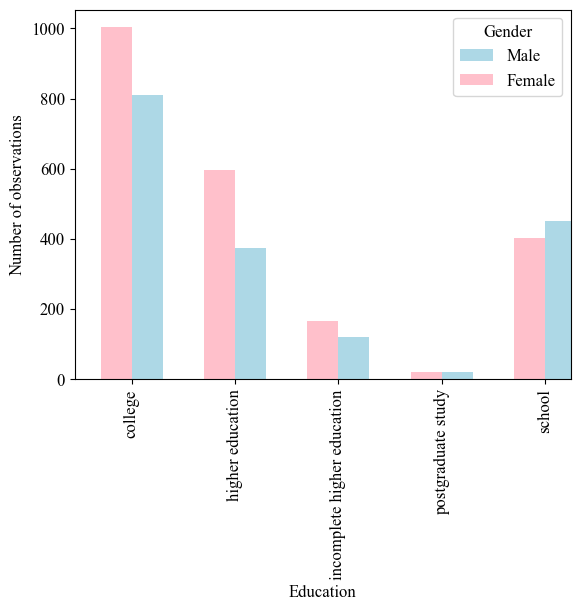

In [206]:

educ_h5 = df_educ.groupby(['h5'])['_educ'].value_counts().unstack(0).fillna(0)
educ_h5[1].sort_index().plot(kind='bar', color='lightblue', position=0, width=0.3, label='Male')
educ_h5[2].sort_index().plot(kind='bar', color='pink', position=1, width=0.3, label='Female')
plt.xlabel('Education')
plt.ylabel('Number of observations')
plt.legend(title='Gender')
plt.show()

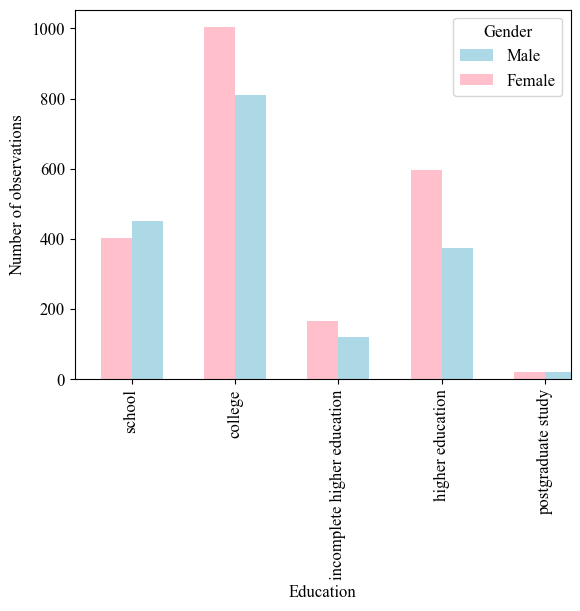

In [207]:
educ_order = ['school', 'college','incomplete higher education','higher education','postgraduate study']

df_educ['_educ'] = pd.Categorical(df_educ['_educ'], categories=educ_order, ordered=True)

educ_h5 = df_educ.groupby(['h5'])['_educ'].value_counts().unstack(0).fillna(0)
educ_h5[1].sort_index().plot(kind='bar', color='lightblue', position=0, width=0.3, label='Male')
educ_h5[2].sort_index().plot(kind='bar', color='pink', position=1, width=0.3, label='Female')
plt.xlabel('Education')
plt.ylabel('Number of observations')
plt.legend(title='Gender')
plt.show()

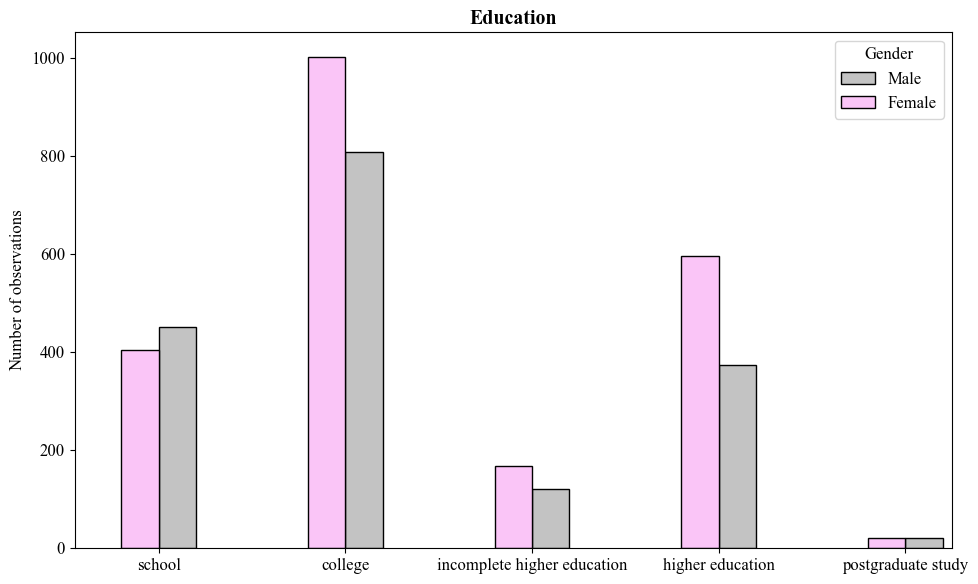

In [208]:
fig, ax = plt.subplots(figsize=(10, 6))  # Установите размеры, которые соответствуют вашим требованиям

educ_order = ['school', 'college','incomplete higher education','higher education','postgraduate study']
df_educ['_educ'] = pd.Categorical(df_educ['_educ'], categories=educ_order, ordered=True)

# Группировка данных и построение графика
educ_h5 = df_educ.groupby(['h5'])['_educ'].value_counts().unstack(0).fillna(0)
educ_h5[1].sort_index().plot(kind='bar', color='#c3c3c3', position=0, width=0.2, label='Male', ax=ax,edgecolor='black')
educ_h5[2].sort_index().plot(kind='bar', color='#fac5f7', position=1, width=0.2, label='Female', ax=ax,edgecolor='black')

# Настройка меток и легенды
plt.title('Education',fontweight="bold")
plt.ylabel('Number of observations')
plt.legend(title='Gender')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
plt.xticks(rotation=0, fontsize='medium')

# Отображение графика
plt.tight_layout()  # Убедитесь, что элементы графика не перекрываются
plt.show()

In [209]:
print(df_educ['h5'].value_counts())

2.0    2191
1.0    1777
Name: h5, dtype: int64


In [210]:
#mean_educ_h5 = df_educ.groupby('h5')['_educ'].mean()
#mean_educ_h5.plot(kind='bar', color=['lightblue', 'pink'])
#plt.xlabel('h5')
#plt.ylabel('Образование')
#plt.xticks(ticks=[0, 1], labels=['Муж', 'Жен'])  # Adjust x-axis labels
## ([<matplotlib.axis.XTick object at 0x7f29f52e29a0>, <matplotlib.axis.XTick object at 0x7f29f52e2040>], [Text(0, 0, '1'), Text(1, 0, '2')])
#plt.show()

In [211]:
df["attitudes"] = pca.fit_transform(df[["j119.1","j119.2",
            "j119.3","j120","j121.1","j121.2","j121.5"]])

In [212]:
resp_h=[int(i[0]) for i in df[df["attitudes"]>df["attitudes"].median()].index]
resp_l=[int(i[0]) for i in df[df["attitudes"]<=df["attitudes"].median()].index]

In [213]:
df["attitudes"].median()

0.054372023217282135

In [214]:
id_inds_h=[]
id_inds_l=[]


wages_mean_l=[]
wages_mean_h=[]
for i in range(12,32):
    
    dddd_h=data[i].loc[data[i]['idind'].isin(resp_h)].copy()
    dddd_l=data[i].loc[data[i]['idind'].isin(resp_l)].copy()
    
    #resp_h=dddd_h['idind'].copy()
    #resp_l=dddd_l['idind'].copy()
    
    dddd_h=dddd_h[(dddd_h[f"{alphabet[i]}j60"]<99999990)][[f"{alphabet[i]}j60","idind"]].dropna().copy()
    dddd_l=dddd_l[(dddd_l[f"{alphabet[i]}j60"]<99999990)][[f"{alphabet[i]}j60","idind"]].dropna().copy()
    
    id_inds_h.append(dddd_h["idind"])
    id_inds_l.append(dddd_l["idind"])
    
    wages_mean_h.append(dddd_h[f"{alphabet[i]}j60"].mean())
    wages_mean_l.append(dddd_l[f"{alphabet[i]}j60"].mean())
    print(len(dddd_l),len(dddd_h))


842 837
732 724
678 683
631 640
607 599
583 555
570 551
556 524
524 503
498 476
477 449
462 432
431 401
424 386
415 371
394 352
379 344
361 321
350 314
320 302


In [215]:
common_h=id_inds_h[0]
common_l=id_inds_l[0]
for i in range(1,len(id_inds_h)):
    common_h=np.intersect1d(common_h,id_inds_h[i])
    common_l=np.intersect1d(common_l,id_inds_l[i])

In [216]:
wages_mean_l=[]
wages_mean_h=[]
for i in range(12,32):
    
    dddd_h=data[i].loc[data[i]['idind'].isin(common_h)].copy()
    dddd_l=data[i].loc[data[i]['idind'].isin(common_l)].copy()
    
    #resp_h=dddd_h['idind'].copy()
    #resp_l=dddd_l['idind'].copy()
    
    dddd_h=dddd_h[(dddd_h[f"{alphabet[i]}j60"]<99999990)][[f"{alphabet[i]}j60","idind"]].dropna().copy()
    dddd_l=dddd_l[(dddd_l[f"{alphabet[i]}j60"]<99999990)][[f"{alphabet[i]}j60","idind"]].dropna().copy()
    
    #id_inds_h.append(dddd_h["idind"])
    #id_inds_l.append(dddd_l["idind"])
    
    wages_mean_h.append(dddd_h[f"{alphabet[i]}j60"].mean())
    wages_mean_l.append(dddd_l[f"{alphabet[i]}j60"].mean())
    print(len(dddd_l),len(dddd_h))

188 166
188 166
188 166
188 166
188 166
188 166
188 166
188 166
188 166
188 166
188 166
188 166
188 166
188 166
188 166
188 166
188 166
188 166
188 166
188 166


In [217]:
pci = pd.read_excel('ИПЦ.xlsx',index_col=0,header=3)
P=pci.loc["Российская Федерация"]/100
P_cum=P.copy()
for i in range(len(P)):
    P_cum.iloc[i]=P.iloc[:i+1].prod()
P_cum[4:-1]/P_cum[4:5].values[0]

2003    1.000000
2004    1.117300
2005    1.239309
2006    1.350847
2007    1.511193
2008    1.711879
2009    1.862524
2010    2.026054
2011    2.149643
2012    2.290875
2013    2.439094
2014    2.715931
2015    3.066558
2016    3.231846
2017    3.312965
2018    3.454097
2019    3.559102
2020    3.733854
2021    4.047124
2022    4.530351
Name: Российская Федерация, dtype: float64

In [218]:
wages_real_in2003_price_h=wages_mean_h/(P_cum[4:-1]/P_cum[4:5].values[0])
wages_real_in2003_price_l=wages_mean_l/(P_cum[4:-1]/P_cum[4:5].values[0])

In [219]:
list(wages_real_in2003_price_h.values)

[3886.4518072289156,
 4049.8501659012313,
 4628.778788181659,
 5483.025835788845,
 6130.2539844660505,
 6850.758400536322,
 6685.977544357881,
 6788.87803326494,
 7408.876124005447,
 7919.713208354581,
 8432.985187420883,
 7778.5584741882285,
 7239.602974621093,
 7379.166396978492,
 7556.594905482407,
 7598.353776600396,
 7185.903482646686,
 7189.52741731085,
 7617.910879111582,
 7296.065214699252]

In [220]:
graph=pd.DataFrame(np.array([list(wages_real_in2003_price_h.values),list(wages_real_in2003_price_l.values)]).T,columns=["More egalitarian","Less egalitarian"])

In [221]:
import plotly.express as pl

In [222]:
fig = pl.line(graph)
fig.update_layout(
    xaxis_title='Years',
    yaxis_title='Average earnings',
    
    # Изменяем шрифт на Times New Roman
    font=dict(
        family="Times New Roman",
        size=12 # Вы можете изменить размер шрифта при необходимости
    )
)
fig.for_each_trace(lambda trace: trace.update(line=dict(color='#a6a1dd')) if trace.name == 'More egalitarian' else trace.update(line=dict(color='#4c62a8')))
fig.update_layout(
    plot_bgcolor='rgba(255,255,255,1)',  # Белый фон для графика
    paper_bgcolor='rgba(255,255,255,1)',# Белый фон для всей области
    legend={
        'font': {'size': 20}  # Размер шрифта элементов легенды
    }
)
fig.update_layout(
    legend_title_text='attitudes'
)
fig.update_xaxes(
    #title_text='Название X оси',
    tickvals=[i for i in range(19)],  # Значения под каждой меткой
    ticktext=[i for i in range(2003,2023)],  # Заменяемые подписи
    title_font={"size": 20} , # Размер шрифта заголовка оси X
    tickfont={"size": 15}
)

fig.update_yaxes(
    #title_text='Название Y оси',
    title_font={"size": 20},  # Размер шрифта заголовка оси Y
    tickfont={"size": 15}  # Размер шрифта меток оси Y
)

fig.show()

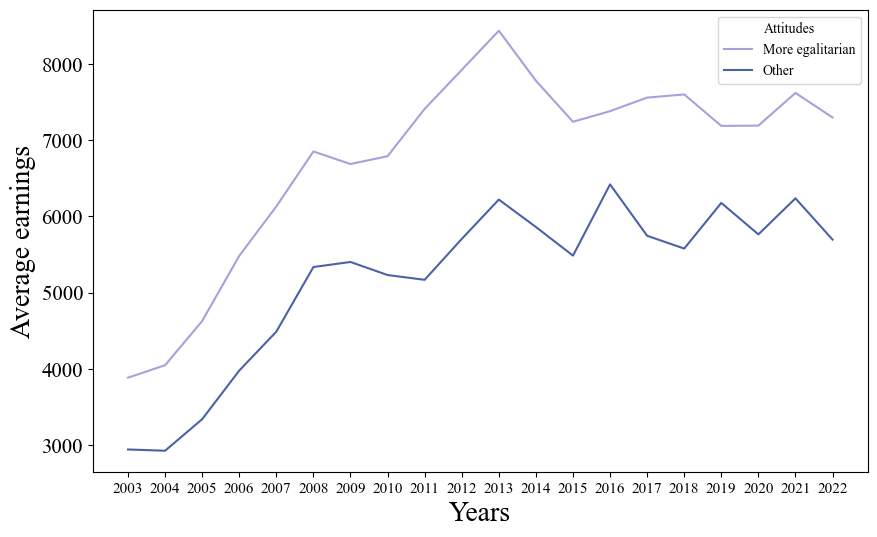

In [223]:
# Пример данных
years = np.arange(2003, 2023)
average_earnings_egalitarian = wages_real_in2003_price_h # Случайные данные для демонстрации
average_earnings_other = wages_real_in2003_price_l  # Случайные данные для демонстрации

# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(10, 6))

# Рисуем линии на графике
ax.plot(years, average_earnings_egalitarian, label='More egalitarian', color='#a6a1dd')
ax.plot(years, average_earnings_other, label='Other', color='#4c62a8')

# Настройка заголовков осей и графика
#ax.set_title('Пример графика', fontsize=20, fontname="Times New Roman")
ax.set_xlabel('Years', fontsize=20, fontname="Times New Roman")
ax.set_ylabel('Average earnings', fontsize=20, fontname="Times New Roman")

# Настройка легенды
legend = ax.legend(title='Attitudes', fontsize=10, title_fontsize='10', frameon=True)

# Настройка шрифтов меток на осях
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

# Настройка меток оси X
ax.set_xticks(years)
ax.set_xticklabels([str(year) for year in years], fontsize=11, fontname="Times New Roman")

# Белый фон для графика и всей области
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Увеличиваем шрифт для всей фигуры
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Показать график
plt.show()

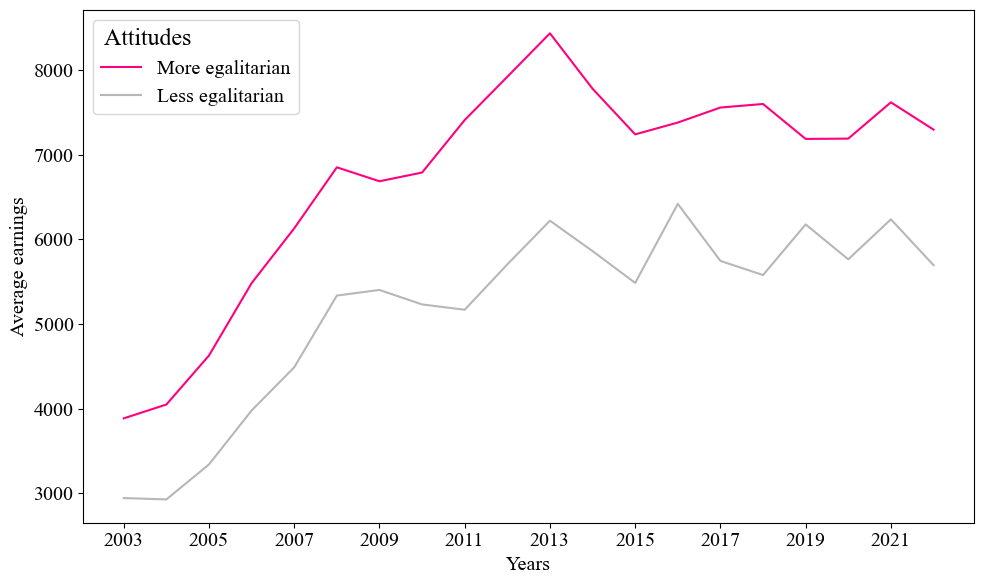

In [224]:
fig, ax = plt.subplots(figsize=(10, 6))

# Рисуем линии на графике
ax.plot(years, average_earnings_egalitarian, label='More egalitarian', color='#ff007e')
ax.plot(years, average_earnings_other, label='Less egalitarian', color='#b7b7b7')

# Настройка заголовков осей и графика
#ax.set_title('Пример графика', fontweight="bold", fontsize='x-large')
ax.set_xlabel('Years', fontsize='large')
ax.set_ylabel('Average earnings', fontsize='large')

# Настройка легенды
legend = ax.legend(title='Attitudes                ', fontsize='large', title_fontsize='x-large', frameon=True)
#plt.setp(legend.get_title(), loc='left')

# Настройка шрифтов меток на осях
ax.xaxis.set_tick_params(labelsize='large')
ax.yaxis.set_tick_params(labelsize='large')

# Настройка меток оси X через два года
xticks = np.arange(2003, 2023, 2)
ax.set_xticks(xticks)

# Вывести график в удобном формате
plt.tight_layout()  # Убедитесь, что элементы графика не перекрываются
plt.show()

In [53]:
df

,,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j121.1,j121.2,j121.5,j1,j10,n5,j6.1a,j2cod08,j69,attitudes
idind,wave,,,,,,,,,,,,,,,,,,,,,
1.0,12,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.0,2.0,21.0,...,2.0,2.0,2.0,2.0,10700.0,1.0,4.0,2341.0,1.0,2.350704
33.0,12,10206.0,1.0,33.0,12,10800.0,2.0,40.0,1000.0,4.0,14.0,...,3.0,3.0,2.0,1.0,1000.0,1.0,13.0,5223.0,3.0,-0.062746
36.0,12,10207.0,1.0,36.0,12,10800.0,2.0,49.0,3600.0,2.0,9.0,...,2.0,3.0,2.0,1.0,3600.0,1.0,8.0,8142.0,1.0,-1.786698
51.0,12,10357.0,1.0,51.0,12,10800.0,2.0,28.0,4670.0,4.0,21.0,...,2.0,1.0,1.0,1.0,2600.0,1.0,8.0,3352.0,3.0,0.116833
57.0,12,10308.0,1.0,57.0,12,10800.0,2.0,50.0,3500.0,4.0,16.0,...,2.0,2.0,2.0,1.0,3500.0,2.0,8.0,4321.0,2.0,0.997497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22760.0,12,2410810.0,141.0,22760.0,12,4952300.0,2.0,41.0,3200.0,3.0,18.0,...,2.0,1.0,1.0,1.0,3200.0,1.0,24.0,5414.0,1.0,-0.908054
22762.0,12,2410818.0,141.0,22762.0,12,4952300.0,2.0,46.0,9000.0,3.0,18.0,...,1.0,1.0,1.0,1.0,9000.0,1.0,12.0,1439.0,1.0,-0.049094
22769.0,12,2410937.0,141.0,22769.0,12,4952300.0,2.0,51.0,3000.0,2.0,16.0,...,2.0,2.0,2.0,1.0,3000.0,1.0,12.0,3343.0,3.0,0.054372


In [54]:
"_marst", '_educ', 'n5', 'j2cod08', "j122.3", "j122.4","j122.5"

('_marst', '_educ', 'n5', 'j2cod08', 'j122.3', 'j122.4', 'j122.5')

In [55]:
df["_marst"].unique()

array([2., 4., 3., 5., 1.])

In [56]:
for i in range(len(df)):
    if df["_marst"].iloc[i]!=2:
        df["_marst"].iloc[i]='single'
    else:
        df["_marst"].iloc[i]='married'

C:\Users\1\AppData\Local\Temp\ipykernel_6548\2880488495.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
df

,,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j121.1,j121.2,j121.5,j1,j10,n5,j6.1a,j2cod08,j69,attitudes
idind,wave,,,,,,,,,,,,,,,,,,,,,
1.0,12,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.0,married,21.0,...,2.0,2.0,2.0,2.0,10700.0,1.0,4.0,2341.0,1.0,2.350704
33.0,12,10206.0,1.0,33.0,12,10800.0,2.0,40.0,1000.0,single,14.0,...,3.0,3.0,2.0,1.0,1000.0,1.0,13.0,5223.0,3.0,-0.062746
36.0,12,10207.0,1.0,36.0,12,10800.0,2.0,49.0,3600.0,married,9.0,...,2.0,3.0,2.0,1.0,3600.0,1.0,8.0,8142.0,1.0,-1.786698
51.0,12,10357.0,1.0,51.0,12,10800.0,2.0,28.0,4670.0,single,21.0,...,2.0,1.0,1.0,1.0,2600.0,1.0,8.0,3352.0,3.0,0.116833
57.0,12,10308.0,1.0,57.0,12,10800.0,2.0,50.0,3500.0,single,16.0,...,2.0,2.0,2.0,1.0,3500.0,2.0,8.0,4321.0,2.0,0.997497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22760.0,12,2410810.0,141.0,22760.0,12,4952300.0,2.0,41.0,3200.0,single,18.0,...,2.0,1.0,1.0,1.0,3200.0,1.0,24.0,5414.0,1.0,-0.908054
22762.0,12,2410818.0,141.0,22762.0,12,4952300.0,2.0,46.0,9000.0,single,18.0,...,1.0,1.0,1.0,1.0,9000.0,1.0,12.0,1439.0,1.0,-0.049094
22769.0,12,2410937.0,141.0,22769.0,12,4952300.0,2.0,51.0,3000.0,married,16.0,...,2.0,2.0,2.0,1.0,3000.0,1.0,12.0,3343.0,3.0,0.054372


In [58]:
print(sorted(df["_educ"].unique()))

[8.0, 9.0, 10.0, 11.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0]


In [59]:
for i in range(len(df)):
    if df["_educ"].iloc[i]==23:
        df["_educ"].iloc[i]='aspa'
    elif df["_educ"].iloc[i]==22 or df["_educ"].iloc[i]==21:
        df["_educ"].iloc[i]='vyshka'
    elif df["_educ"].iloc[i]==20 or df["_educ"].iloc[i]==19:
        df["_educ"].iloc[i]='nezak vyshka'  
    elif df["_educ"].iloc[i]==18 or df["_educ"].iloc[i]==16 or df["_educ"].iloc[i]==11:
        df["_educ"].iloc[i]='college' 
    else:
        df["_educ"].iloc[i]='school'
df

C:\Users\1\AppData\Local\Temp\ipykernel_6548\1908407602.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j121.1,j121.2,j121.5,j1,j10,n5,j6.1a,j2cod08,j69,attitudes
idind,wave,,,,,,,,,,,,,,,,,,,,,
1.0,12,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.0,married,vyshka,...,2.0,2.0,2.0,2.0,10700.0,1.0,4.0,2341.0,1.0,2.350704
33.0,12,10206.0,1.0,33.0,12,10800.0,2.0,40.0,1000.0,single,school,...,3.0,3.0,2.0,1.0,1000.0,1.0,13.0,5223.0,3.0,-0.062746
36.0,12,10207.0,1.0,36.0,12,10800.0,2.0,49.0,3600.0,married,school,...,2.0,3.0,2.0,1.0,3600.0,1.0,8.0,8142.0,1.0,-1.786698
51.0,12,10357.0,1.0,51.0,12,10800.0,2.0,28.0,4670.0,single,vyshka,...,2.0,1.0,1.0,1.0,2600.0,1.0,8.0,3352.0,3.0,0.116833
57.0,12,10308.0,1.0,57.0,12,10800.0,2.0,50.0,3500.0,single,college,...,2.0,2.0,2.0,1.0,3500.0,2.0,8.0,4321.0,2.0,0.997497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22760.0,12,2410810.0,141.0,22760.0,12,4952300.0,2.0,41.0,3200.0,single,college,...,2.0,1.0,1.0,1.0,3200.0,1.0,24.0,5414.0,1.0,-0.908054
22762.0,12,2410818.0,141.0,22762.0,12,4952300.0,2.0,46.0,9000.0,single,college,...,1.0,1.0,1.0,1.0,9000.0,1.0,12.0,1439.0,1.0,-0.049094
22769.0,12,2410937.0,141.0,22769.0,12,4952300.0,2.0,51.0,3000.0,married,college,...,2.0,2.0,2.0,1.0,3000.0,1.0,12.0,3343.0,3.0,0.054372


In [60]:
df["n5"].unique()

array([1., 2.])

In [61]:
for i in range(len(df)):
    if df["n5"].iloc[i]==1:
        df["n5"].iloc[i]='YES'
    else:
        df["n5"].iloc[i]='NO'
df

C:\Users\1\AppData\Local\Temp\ipykernel_6548\796918563.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j121.1,j121.2,j121.5,j1,j10,n5,j6.1a,j2cod08,j69,attitudes
idind,wave,,,,,,,,,,,,,,,,,,,,,
1.0,12,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.0,married,vyshka,...,2.0,2.0,2.0,2.0,10700.0,YES,4.0,2341.0,1.0,2.350704
33.0,12,10206.0,1.0,33.0,12,10800.0,2.0,40.0,1000.0,single,school,...,3.0,3.0,2.0,1.0,1000.0,YES,13.0,5223.0,3.0,-0.062746
36.0,12,10207.0,1.0,36.0,12,10800.0,2.0,49.0,3600.0,married,school,...,2.0,3.0,2.0,1.0,3600.0,YES,8.0,8142.0,1.0,-1.786698
51.0,12,10357.0,1.0,51.0,12,10800.0,2.0,28.0,4670.0,single,vyshka,...,2.0,1.0,1.0,1.0,2600.0,YES,8.0,3352.0,3.0,0.116833
57.0,12,10308.0,1.0,57.0,12,10800.0,2.0,50.0,3500.0,single,college,...,2.0,2.0,2.0,1.0,3500.0,NO,8.0,4321.0,2.0,0.997497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22760.0,12,2410810.0,141.0,22760.0,12,4952300.0,2.0,41.0,3200.0,single,college,...,2.0,1.0,1.0,1.0,3200.0,YES,24.0,5414.0,1.0,-0.908054
22762.0,12,2410818.0,141.0,22762.0,12,4952300.0,2.0,46.0,9000.0,single,college,...,1.0,1.0,1.0,1.0,9000.0,YES,12.0,1439.0,1.0,-0.049094
22769.0,12,2410937.0,141.0,22769.0,12,4952300.0,2.0,51.0,3000.0,married,college,...,2.0,2.0,2.0,1.0,3000.0,YES,12.0,3343.0,3.0,0.054372


In [62]:
df['j2cod08'] = df['j2cod08'].astype( str )

In [63]:
df['j2cod08'].iloc[0][0]

'2'

In [64]:
for i in range(len(df)):
    if df["j2cod08"].iloc[i][0]=='1':
        df["j2cod08"].iloc[i]='Managers'
    elif df["j2cod08"].iloc[i][0]=='2':
        df["j2cod08"].iloc[i]='Proffessionals'
    elif df["j2cod08"].iloc[i][0]=='3':
        df["j2cod08"].iloc[i]='TaAP'
    elif df["j2cod08"].iloc[i][0]=='4':
        df["j2cod08"].iloc[i]='SCW'
    elif df["j2cod08"].iloc[i][0]=='5':
        df["j2cod08"].iloc[i]='SaSW'
    elif df["j2cod08"].iloc[i][0]=='6':
        df["j2cod08"].iloc[i]='SAFaFW'
    elif df["j2cod08"].iloc[i][0]=='7':
        df["j2cod08"].iloc[i]='CaRTW'
    elif df["j2cod08"].iloc[i][0]=='8':
        df["j2cod08"].iloc[i]='PaMOaA'
    elif df["j2cod08"].iloc[i][0]=='9':
        df["j2cod08"].iloc[i]='EO'
    else:
        df["j2cod08"].iloc[i]='Army'
df

C:\Users\1\AppData\Local\Temp\ipykernel_6548\962476771.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\1\AppData\Local\Temp\ipykernel_6548\962476771.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\1\AppData\Local\Temp\ipykernel_6548\962476771.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\1\AppData\Local\Temp\ipykernel_6548\962476771.py:7: SettingWithCopyWarning:


A value is trying to be set o

,,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j121.1,j121.2,j121.5,j1,j10,n5,j6.1a,j2cod08,j69,attitudes
idind,wave,,,,,,,,,,,,,,,,,,,,,
1.0,12,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.0,married,vyshka,...,2.0,2.0,2.0,2.0,10700.0,YES,4.0,Proffessionals,1.0,2.350704
33.0,12,10206.0,1.0,33.0,12,10800.0,2.0,40.0,1000.0,single,school,...,3.0,3.0,2.0,1.0,1000.0,YES,13.0,SaSW,3.0,-0.062746
36.0,12,10207.0,1.0,36.0,12,10800.0,2.0,49.0,3600.0,married,school,...,2.0,3.0,2.0,1.0,3600.0,YES,8.0,PaMOaA,1.0,-1.786698
51.0,12,10357.0,1.0,51.0,12,10800.0,2.0,28.0,4670.0,single,vyshka,...,2.0,1.0,1.0,1.0,2600.0,YES,8.0,TaAP,3.0,0.116833
57.0,12,10308.0,1.0,57.0,12,10800.0,2.0,50.0,3500.0,single,college,...,2.0,2.0,2.0,1.0,3500.0,NO,8.0,SCW,2.0,0.997497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22760.0,12,2410810.0,141.0,22760.0,12,4952300.0,2.0,41.0,3200.0,single,college,...,2.0,1.0,1.0,1.0,3200.0,YES,24.0,SaSW,1.0,-0.908054
22762.0,12,2410818.0,141.0,22762.0,12,4952300.0,2.0,46.0,9000.0,single,college,...,1.0,1.0,1.0,1.0,9000.0,YES,12.0,Managers,1.0,-0.049094
22769.0,12,2410937.0,141.0,22769.0,12,4952300.0,2.0,51.0,3000.0,married,college,...,2.0,2.0,2.0,1.0,3000.0,YES,12.0,TaAP,3.0,0.054372


In [65]:
df["j2cod08"].unique()

array(['Proffessionals', 'SaSW', 'PaMOaA', 'TaAP', 'SCW', 'EO', 'CaRTW',
       'Managers', 'Army'], dtype=object)

In [66]:
df.columns

Index(['hid_h', 'region', 'idind', 'wave', 'popul', 'h5', '_age', 'j60',
       '_marst', '_educ', 'j119.1', 'j119.2', 'j119.3', 'j120', 'j121.1',
       'j121.2', 'j121.5', 'j1', 'j10', 'n5', 'j6.1a', 'j2cod08', 'j69',
       'attitudes'],
      dtype='object')

In [67]:
df

,,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j121.1,j121.2,j121.5,j1,j10,n5,j6.1a,j2cod08,j69,attitudes
idind,wave,,,,,,,,,,,,,,,,,,,,,
1.0,12,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.0,married,vyshka,...,2.0,2.0,2.0,2.0,10700.0,YES,4.0,Proffessionals,1.0,2.350704
33.0,12,10206.0,1.0,33.0,12,10800.0,2.0,40.0,1000.0,single,school,...,3.0,3.0,2.0,1.0,1000.0,YES,13.0,SaSW,3.0,-0.062746
36.0,12,10207.0,1.0,36.0,12,10800.0,2.0,49.0,3600.0,married,school,...,2.0,3.0,2.0,1.0,3600.0,YES,8.0,PaMOaA,1.0,-1.786698
51.0,12,10357.0,1.0,51.0,12,10800.0,2.0,28.0,4670.0,single,vyshka,...,2.0,1.0,1.0,1.0,2600.0,YES,8.0,TaAP,3.0,0.116833
57.0,12,10308.0,1.0,57.0,12,10800.0,2.0,50.0,3500.0,single,college,...,2.0,2.0,2.0,1.0,3500.0,NO,8.0,SCW,2.0,0.997497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22760.0,12,2410810.0,141.0,22760.0,12,4952300.0,2.0,41.0,3200.0,single,college,...,2.0,1.0,1.0,1.0,3200.0,YES,24.0,SaSW,1.0,-0.908054
22762.0,12,2410818.0,141.0,22762.0,12,4952300.0,2.0,46.0,9000.0,single,college,...,1.0,1.0,1.0,1.0,9000.0,YES,12.0,Managers,1.0,-0.049094
22769.0,12,2410937.0,141.0,22769.0,12,4952300.0,2.0,51.0,3000.0,married,college,...,2.0,2.0,2.0,1.0,3000.0,YES,12.0,TaAP,3.0,0.054372


In [68]:
#for j in [1,2,3,4,5,6]:
#    for i in range(len(df)):
#        if df[f"j122.{j}"].iloc[i]==1:
#            df[f"j122.{j}"].iloc[i]='YES'
#        else:
#            df[f"j122.{j}"].iloc[i]='NO'
#df

In [69]:
df=pd.get_dummies (df, columns=["_marst", '_educ', 'n5', 'j2cod08'])

In [70]:
df.columns

Index(['hid_h', 'region', 'idind', 'wave', 'popul', 'h5', '_age', 'j60',
       'j119.1', 'j119.2', 'j119.3', 'j120', 'j121.1', 'j121.2', 'j121.5',
       'j1', 'j10', 'j6.1a', 'j69', 'attitudes', '_marst_married',
       '_marst_single', '_educ_aspa', '_educ_college', '_educ_nezak vyshka',
       '_educ_school', '_educ_vyshka', 'n5_NO', 'n5_YES', 'j2cod08_Army',
       'j2cod08_CaRTW', 'j2cod08_EO', 'j2cod08_Managers', 'j2cod08_PaMOaA',
       'j2cod08_Proffessionals', 'j2cod08_SCW', 'j2cod08_SaSW',
       'j2cod08_TaAP'],
      dtype='object')

In [71]:
#чем больше -  тем либеральнее

In [72]:
pca.transform(df[['j119.1', 'j119.2', 'j119.3', 'j120', 'j121.1',
       'j121.2', 'j121.5']])

array([[ 2.35070407],
       [-0.06274596],
       [-1.78669793],
       ...,
       [ 0.05437202],
       [ 0.3206216 ],
       [ 0.35941609]])

In [73]:
len(XPCAreduced)

3968

In [74]:
df['attitudes']=pca.transform(df[['j119.1', 'j119.2', 'j119.3', 'j120', 'j121.1',
       'j121.2', 'j121.5']])
df

,,hid_h,region,idind,wave,popul,h5,_age,j60,j119.1,j119.2,...,n5_YES,j2cod08_Army,j2cod08_CaRTW,j2cod08_EO,j2cod08_Managers,j2cod08_PaMOaA,j2cod08_Proffessionals,j2cod08_SCW,j2cod08_SaSW,j2cod08_TaAP
idind,wave,,,,,,,,,,,,,,,,,,,,,
1.0,12,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.0,4.0,2.0,...,1,0,0,0,0,0,1,0,0,0
33.0,12,10206.0,1.0,33.0,12,10800.0,2.0,40.0,1000.0,4.0,3.0,...,1,0,0,0,0,0,0,0,1,0
36.0,12,10207.0,1.0,36.0,12,10800.0,2.0,49.0,3600.0,1.0,2.0,...,1,0,0,0,0,1,0,0,0,0
51.0,12,10357.0,1.0,51.0,12,10800.0,2.0,28.0,4670.0,4.0,3.0,...,1,0,0,0,0,0,0,0,0,1
57.0,12,10308.0,1.0,57.0,12,10800.0,2.0,50.0,3500.0,3.0,2.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22760.0,12,2410810.0,141.0,22760.0,12,4952300.0,2.0,41.0,3200.0,2.0,2.0,...,1,0,0,0,0,0,0,0,1,0
22762.0,12,2410818.0,141.0,22762.0,12,4952300.0,2.0,46.0,9000.0,4.0,4.0,...,1,0,0,0,1,0,0,0,0,0
22769.0,12,2410937.0,141.0,22769.0,12,4952300.0,2.0,51.0,3000.0,3.0,3.0,...,1,0,0,0,0,0,0,0,0,1


In [75]:
df["age_sq"]=df["_age"]**2

In [76]:
from statsmodels.regression.linear_model import OLS

In [77]:
XX=df[['popul',"_age", '_marst_married', '_educ_aspa', '_educ_college',
      '_educ_nezak vyshka','_educ_vyshka', 'n5_YES', 'j2cod08_Army',
      'j2cod08_CaRTW', 'j2cod08_EO', 'j2cod08_Managers', 'j2cod08_PaMOaA',
      'j2cod08_Proffessionals', 'j2cod08_SCW', 'j2cod08_SaSW',"attitudes","j6.1a","age_sq",'j69']].copy()
XX["const"]=1

In [78]:
XX

,,popul,_age,_marst_married,_educ_aspa,_educ_college,_educ_nezak vyshka,_educ_vyshka,n5_YES,j2cod08_Army,j2cod08_CaRTW,...,j2cod08_Managers,j2cod08_PaMOaA,j2cod08_Proffessionals,j2cod08_SCW,j2cod08_SaSW,attitudes,j6.1a,age_sq,j69,const
idind,wave,,,,,,,,,,,,,,,,,,,,,
1.0,12,10800.0,30.0,1,0,0,0,1,1,0,0,...,0,0,1,0,0,2.350704,4.0,900.0,1.0,1
33.0,12,10800.0,40.0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,-0.062746,13.0,1600.0,3.0,1
36.0,12,10800.0,49.0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,-1.786698,8.0,2401.0,1.0,1
51.0,12,10800.0,28.0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0.116833,8.0,784.0,3.0,1
57.0,12,10800.0,50.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0.997497,8.0,2500.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22760.0,12,4952300.0,41.0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,-0.908054,24.0,1681.0,1.0,1
22762.0,12,4952300.0,46.0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,-0.049094,12.0,2116.0,1.0,1
22769.0,12,4952300.0,51.0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0.054372,12.0,2601.0,3.0,1


In [79]:
lm_noIV_j10=OLS(df["j10"],XX)
results_noIV_j10=lm_noIV_j10.fit(cov_type="HC3")
results_noIV_j10.summary()

D:\conda\lib\site-packages\statsmodels\base\model.py:1888: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 20, but rank is 19



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    j10   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     11.97
Date:                 Пт, 21 июн 2024   Prob (F-statistic):           4.91e-35
Time:                        15:44:19   Log-Likelihood:                -15854.
No. Observations:                1679   AIC:                         3.175e+04
Df Residuals:                    1658   BIC:                         3.186e+04
Df Model:                          20                                         
Covariance Type:                  HC3                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
popul                      0.0004   4.34e-05      9.570      0.000       0.000       0.001
_age                     148.0092     71.492      2.070      0.038       7.886     288.132
_marst_married           -87.0744    154.641     -0.563      0.573    -390.165     216.016
_educ_aspa               870.8323    651.965      1.336      0.182    -406.995    2148.660
_educ_college            345.1723    181.956      1.897      0.058     -11.455     701.799
_educ_nezak vyshka       572.6383    325.011      1.762      0.078     -64.372    1209.648
_educ_vyshka            1399.9585    296.766      4.717      0.000     818.307    1981.610
n5_YES                   -35.8272    236.964     -0.151      0.880    -500.268     428.614
j2cod08_Army            3220.9615   1.09e+04      0.295      0.768   -1.82e+04    2.46e+04
j2cod08_CaRTW            663.1539    419.782      1.580      0.114    -159.604    1485.912
j2cod08_EO             -1057.6810    221.638     -4.772      0.000   -1492.084    -623.278
j2cod08_Managers        2948.4708    703.775      4.190      0.000    1569.097    4327.845
j2cod08_PaMOaA           408.4822    288.155      1.418      0.156    -156.292     973.256
j2cod08_Proffessionals  -426.4680    289.368     -1.474      0.141    -993.618     140.682
j2cod08_SCW             -158.8540    272.464     -0.583      0.560    -692.874     375.166
j2cod08_SaSW            -620.5155    210.255     -2.951      0.003   -1032.608    -208.423
attitudes                299.8749     65.151      4.603      0.000     172.181     427.569
j6.1a                     83.4136     18.982      4.394      0.000      46.210     120.617
age_sq                    -1.5506      0.949     -1.633      0.102      -3.411       0.310
j69                     -130.2774     83.657     -1.557      0.119    -294.242      33.687
const                   -897.2343   1229.521     -0.730      0.466   -3307.051    1512.582
==============================================================================
Omnibus:                     1112.437   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18300.507
Skew:                           2.874   Prob(JB):                         0.00
Kurtosis:                      18.118   Cond. No.                     1.17e+08
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
hypotheses = '(age_sq = 0)'
f_test = results_noIV_j10.f_test(hypotheses)
f_test

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=2.6682904388043007, p=0.10255578828871759, df_denom=1.66e+03, df_num=1>

In [81]:
XX=df[['popul',"_age", '_marst_married', '_educ_aspa', '_educ_college',
      '_educ_nezak vyshka','_educ_vyshka', 'n5_YES', 'j2cod08_Army',
      'j2cod08_CaRTW', 'j2cod08_EO', 'j2cod08_Managers', 'j2cod08_PaMOaA',
      'j2cod08_Proffessionals', 'j2cod08_SCW', 'j2cod08_SaSW',"attitudes","j6.1a","age_sq",'j69']].copy()
XX["const"]=1

In [82]:
lm_noIV_j60=OLS(df["j60"],XX)
results_noIV_j60=lm_noIV_j60.fit(cov_type="HC3")
results_noIV_j60.summary()

D:\conda\lib\site-packages\statsmodels\base\model.py:1888: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 20, but rank is 19



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    j60   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     12.31
Date:                 Пт, 21 июн 2024   Prob (F-statistic):           3.61e-36
Time:                        15:44:19   Log-Likelihood:                -16058.
No. Observations:                1679   AIC:                         3.216e+04
Df Residuals:                    1658   BIC:                         3.227e+04
Df Model:                          20                                         
Covariance Type:                  HC3                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
popul                      0.0004   4.45e-05      9.321      0.000       0.000       0.001
_age                     186.9452     80.824      2.313      0.021      28.532     345.358
_marst_married          -480.3000    176.151     -2.727      0.006    -825.550    -135.049
_educ_aspa              2857.7295   1745.516      1.637      0.102    -563.419    6278.878
_educ_college            276.9190    203.845      1.358      0.174    -122.610     676.448
_educ_nezak vyshka       675.0169    366.492      1.842      0.065     -43.294    1393.328
_educ_vyshka            1650.9135    333.675      4.948      0.000     996.923    2304.904
n5_YES                    25.1600    441.292      0.057      0.955    -839.756     890.076
j2cod08_Army            2276.3467   1.53e+04      0.149      0.882   -2.77e+04    3.23e+04
j2cod08_CaRTW            459.4354    446.535      1.029      0.304    -415.758    1334.629
j2cod08_EO             -1135.9135    269.928     -4.208      0.000   -1664.964    -606.863
j2cod08_Managers        3050.1679    744.958      4.094      0.000    1590.077    4510.259
j2cod08_PaMOaA           306.2002    330.686      0.926      0.354    -341.932     954.332
j2cod08_Proffessionals  -546.9916    335.055     -1.633      0.103   -1203.688     109.705
j2cod08_SCW             -428.5664    304.425     -1.408      0.159   -1025.228     168.096
j2cod08_SaSW            -793.3916    240.927     -3.293      0.001   -1265.599    -321.184
attitudes                346.8098     70.092      4.948      0.000     209.431     484.188
j6.1a                     65.6485     20.163      3.256      0.001      26.130     105.167
age_sq                    -1.9546      1.069     -1.829      0.067      -4.049       0.140
j69                     -192.8259     93.475     -2.063      0.039    -376.034      -9.618
const                   -649.9478   1358.245     -0.479      0.632   -3312.058    2012.163
==============================================================================
Omnibus:                     1113.851   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17620.458
Skew:                           2.895   Prob(JB):                         0.00
Kurtosis:                      17.776   Cond. No.                     1.17e+08
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
df_stat=df.copy()

In [84]:
df_stat.columns

Index(['hid_h', 'region', 'idind', 'wave', 'popul', 'h5', '_age', 'j60',
       'j119.1', 'j119.2', 'j119.3', 'j120', 'j121.1', 'j121.2', 'j121.5',
       'j1', 'j10', 'j6.1a', 'j69', 'attitudes', '_marst_married',
       '_marst_single', '_educ_aspa', '_educ_college', '_educ_nezak vyshka',
       '_educ_school', '_educ_vyshka', 'n5_NO', 'n5_YES', 'j2cod08_Army',
       'j2cod08_CaRTW', 'j2cod08_EO', 'j2cod08_Managers', 'j2cod08_PaMOaA',
       'j2cod08_Proffessionals', 'j2cod08_SCW', 'j2cod08_SaSW', 'j2cod08_TaAP',
       'age_sq'],
      dtype='object')

In [85]:
for i in range (len(df)):
    if df["j1"].iloc[i]==5:
        df["j1"].iloc[i]=0
    else:
        df["j1"].iloc[i]=1

C:\Users\1\AppData\Local\Temp\ipykernel_6548\4111457082.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
df_stat

,,hid_h,region,idind,wave,popul,h5,_age,j60,j119.1,j119.2,...,j2cod08_Army,j2cod08_CaRTW,j2cod08_EO,j2cod08_Managers,j2cod08_PaMOaA,j2cod08_Proffessionals,j2cod08_SCW,j2cod08_SaSW,j2cod08_TaAP,age_sq
idind,wave,,,,,,,,,,,,,,,,,,,,,
1.0,12,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.0,4.0,2.0,...,0,0,0,0,0,1,0,0,0,900.0
33.0,12,10206.0,1.0,33.0,12,10800.0,2.0,40.0,1000.0,4.0,3.0,...,0,0,0,0,0,0,0,1,0,1600.0
36.0,12,10207.0,1.0,36.0,12,10800.0,2.0,49.0,3600.0,1.0,2.0,...,0,0,0,0,1,0,0,0,0,2401.0
51.0,12,10357.0,1.0,51.0,12,10800.0,2.0,28.0,4670.0,4.0,3.0,...,0,0,0,0,0,0,0,0,1,784.0
57.0,12,10308.0,1.0,57.0,12,10800.0,2.0,50.0,3500.0,3.0,2.0,...,0,0,0,0,0,0,1,0,0,2500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22760.0,12,2410810.0,141.0,22760.0,12,4952300.0,2.0,41.0,3200.0,2.0,2.0,...,0,0,0,0,0,0,0,1,0,1681.0
22762.0,12,2410818.0,141.0,22762.0,12,4952300.0,2.0,46.0,9000.0,4.0,4.0,...,0,0,0,1,0,0,0,0,0,2116.0
22769.0,12,2410937.0,141.0,22769.0,12,4952300.0,2.0,51.0,3000.0,3.0,3.0,...,0,0,0,0,0,0,0,0,1,2601.0


In [87]:
from tabulate import tabulate

In [88]:
# Рассчитываем описательную статистику для числовых столбцов
numeric_stats = df_stat.describe()

# Создаем таблицу для вывода
table_data = []

# Добавляем названия столбцов в первую строку
column_names = ['Variable', 'Count', 'Mean', 'Median', 'Std', 'Min', 'Max']
table_data.append(column_names)

# Добавляем статистики для каждой переменной
for column in numeric_stats.columns:
    variable_stats = [column]
    variable_stats.extend(['{:.2f}'.format(numeric_stats.loc['count', column]),
                           '{:.2f}'.format(numeric_stats.loc['mean', column]),
                           '{:.2f}'.format(numeric_stats.loc['50%', column]),
                           '{:.2f}'.format(numeric_stats.loc['std', column]),
                           '{:.2f}'.format(numeric_stats.loc['min', column]),
                           '{:.2f}'.format(numeric_stats.loc['max', column])])
    table_data.append(variable_stats)

# Выводим результаты
print("Описательная статистика для числовых столбцов:")
print(tabulate(table_data, headers='firstrow', tablefmt='grid'))

Описательная статистика для числовых столбцов:
+------------------------+---------+------------------+-----------+------------------+----------+-----------------+
| Variable               |   Count |             Mean |    Median |              Std |      Min |             Max |
+========================+=========+==================+===========+==================+==========+=================+
| hid_h                  |    1679 | 966131           | 890402    | 625035           | 10101    |     2.41163e+06 |
+------------------------+---------+------------------+-----------+------------------+----------+-----------------+
| region                 |    1679 |     86.1         |     89    |     44.73        |     1    |   161           |
+------------------------+---------+------------------+-----------+------------------+----------+-----------------+
| idind                  |    1679 |  11816.5         |  12281    |   7084.3         |     1    | 52951           |
+------------------------

In [89]:
XX=df[['popul',"_age", '_marst_married', '_educ_aspa', '_educ_college',
      '_educ_nezak vyshka','_educ_vyshka', 'n5_YES', 'j2cod08_Army',
      'j2cod08_CaRTW', 'j2cod08_EO', 'j2cod08_Managers', 'j2cod08_PaMOaA',
      'j2cod08_Proffessionals', 'j2cod08_SCW', 'j2cod08_SaSW',"attitudes","j6.1a","age_sq",'j69']].copy()
XX["const"]=1

In [90]:
lm_noIV_j10=OLS(np.log(df["j10"]),XX)
results_noIV_j10=lm_noIV_j10.fit(cov_type="HC3")
results_noIV_j10.summary()

D:\conda\lib\site-packages\statsmodels\base\model.py:1888: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 20, but rank is 19



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    j10   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     20.03
Date:                 Пт, 21 июн 2024   Prob (F-statistic):           1.56e-61
Time:                        15:44:21   Log-Likelihood:                -1802.2
No. Observations:                1679   AIC:                             3646.
Df Residuals:                    1658   BIC:                             3760.
Df Model:                          20                                         
Covariance Type:                  HC3                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
popul                   9.238e-08   6.95e-09     13.287      0.000    7.88e-08    1.06e-07
_age                       0.0565      0.019      3.028      0.002       0.020       0.093
_marst_married            -0.0660      0.036     -1.818      0.069      -0.137       0.005
_educ_aspa                 0.4974      0.167      2.972      0.003       0.169       0.826
_educ_college              0.1351      0.051      2.648      0.008       0.035       0.235
_educ_nezak vyshka         0.1939      0.088      2.194      0.028       0.021       0.367
_educ_vyshka               0.4439      0.069      6.463      0.000       0.309       0.579
n5_YES                    -0.1380      0.076     -1.804      0.071      -0.288       0.012
j2cod08_Army               0.9979     49.067      0.020      0.984     -95.171      97.167
j2cod08_CaRTW              0.2222      0.088      2.518      0.012       0.049       0.395
j2cod08_EO                -0.3584      0.072     -4.953      0.000      -0.500      -0.217
j2cod08_Managers           0.4259      0.104      4.076      0.000       0.221       0.631
j2cod08_PaMOaA             0.2664      0.073      3.650      0.000       0.123       0.409
j2cod08_Proffessionals    -0.0748      0.058     -1.286      0.198      -0.189       0.039
j2cod08_SCW               -0.0026      0.073     -0.035      0.972      -0.145       0.140
j2cod08_SaSW              -0.1498      0.057     -2.629      0.009      -0.262      -0.038
attitudes                  0.0742      0.014      5.125      0.000       0.046       0.103
j6.1a                      0.0268      0.005      5.505      0.000       0.017       0.036
age_sq                    -0.0006      0.000     -2.380      0.017      -0.001      -0.000
j69                       -0.0118      0.020     -0.582      0.561      -0.051       0.028
const                      6.2766      0.333     18.852      0.000       5.624       6.929
==============================================================================
Omnibus:                        7.274   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.970
Skew:                          -0.101   Prob(JB):                       0.0186
Kurtosis:                       3.271   Cond. No.                     1.17e+08
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
XX=df[['popul',"_age", '_marst_married', '_educ_aspa', '_educ_college',
      '_educ_nezak vyshka','_educ_vyshka', 'n5_YES', 'j2cod08_Army',
      'j2cod08_CaRTW', 'j2cod08_EO', 'j2cod08_Managers', 'j2cod08_PaMOaA',
      'j2cod08_Proffessionals', 'j2cod08_SCW', 'j2cod08_SaSW',"attitudes","j6.1a","age_sq",'j69']].copy()
XX["const"]=1

In [92]:
lm_noIV_j60=OLS(np.log(df["j60"]),XX)
results_noIV_j60=lm_noIV_j60.fit(cov_type="HC3")
results_noIV_j60.summary()

D:\conda\lib\site-packages\statsmodels\base\model.py:1888: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 20, but rank is 19



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    j60   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     22.43
Date:                 Пт, 21 июн 2024   Prob (F-statistic):           3.47e-69
Time:                        15:44:21   Log-Likelihood:                -1782.6
No. Observations:                1679   AIC:                             3607.
Df Residuals:                    1658   BIC:                             3721.
Df Model:                          20                                         
Covariance Type:                  HC3                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
popul                   8.471e-08   6.72e-09     12.610      0.000    7.15e-08    9.79e-08
_age                       0.0581      0.019      3.130      0.002       0.022       0.095
_marst_married            -0.1479      0.036     -4.105      0.000      -0.218      -0.077
_educ_aspa                 0.5979      0.208      2.876      0.004       0.190       1.005
_educ_college              0.0950      0.050      1.895      0.058      -0.003       0.193
_educ_nezak vyshka         0.1487      0.092      1.623      0.105      -0.031       0.328
_educ_vyshka               0.4325      0.066      6.522      0.000       0.303       0.562
n5_YES                    -0.0405      0.083     -0.488      0.625      -0.203       0.122
j2cod08_Army               0.7928     54.400      0.015      0.988    -105.829     107.415
j2cod08_CaRTW              0.1578      0.082      1.921      0.055      -0.003       0.319
j2cod08_EO                -0.3210      0.074     -4.319      0.000      -0.467      -0.175
j2cod08_Managers           0.4277      0.095      4.479      0.000       0.241       0.615
j2cod08_PaMOaA             0.2206      0.072      3.046      0.002       0.079       0.363
j2cod08_Proffessionals    -0.0963      0.058     -1.668      0.095      -0.209       0.017
j2cod08_SCW               -0.0550      0.074     -0.746      0.456      -0.200       0.090
j2cod08_SaSW              -0.1678      0.056     -3.010      0.003      -0.277      -0.059
attitudes                  0.0751      0.014      5.305      0.000       0.047       0.103
j6.1a                      0.0197      0.005      4.250      0.000       0.011       0.029
age_sq                    -0.0006      0.000     -2.444      0.015      -0.001      -0.000
j69                       -0.0289      0.020     -1.413      0.158      -0.069       0.011
const                      6.4984      0.331     19.641      0.000       5.850       7.147
==============================================================================
Omnibus:                        6.420   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                7.160
Skew:                          -0.081   Prob(JB):                       0.0279
Kurtosis:                       3.275   Cond. No.                     1.17e+08
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
ivi=panel.copy()
del ivi["n5"]
ivi = ivi.set_index(["idind", "wave"], drop=False)
ivi=ivi[(ivi["_age"]>18)][ivi[(ivi["_age"]>18)]<99999990].dropna()
ivi

,,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j119.3,j120,j121.1,j121.2,j121.5,j1,j10,j6.1a,j2cod08,j69
idind,wave,,,,,,,,,,,,,,,,,,,,,
1.0,12,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.00,2.0,21.0,...,5.0,2.0,2.0,2.0,2.0,2.0,10700.00,4.0,2341.0,1.0
7.0,12,10103.0,1.0,7.0,12,10800.0,2.0,59.0,3766.62,1.0,10.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2217.62,6.0,3412.0,2.0
9.0,12,10105.0,1.0,9.0,12,10800.0,2.0,57.0,1700.00,2.0,18.0,...,2.0,2.0,2.0,2.0,2.0,1.0,500.00,8.0,5153.0,3.0
28.0,12,10204.0,1.0,28.0,12,10800.0,1.0,35.0,15000.00,2.0,10.0,...,1.0,1.0,3.0,3.0,2.0,1.0,15000.00,8.0,1311.0,3.0
33.0,12,10206.0,1.0,33.0,12,10800.0,2.0,40.0,1000.00,4.0,14.0,...,2.0,2.0,3.0,3.0,2.0,1.0,1000.00,13.0,5223.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22774.0,12,2411251.0,141.0,22774.0,12,4952300.0,1.0,30.0,8000.00,3.0,20.0,...,3.0,2.0,2.0,2.0,1.0,1.0,8000.00,8.0,2114.0,2.0
22778.0,12,2411611.0,141.0,22778.0,12,4952300.0,2.0,52.0,8500.00,1.0,14.0,...,3.0,2.0,2.0,2.0,2.0,1.0,8500.00,10.0,4211.0,2.0
22779.0,12,2411611.0,141.0,22779.0,12,4952300.0,1.0,19.0,5000.00,1.0,18.0,...,4.0,2.0,2.0,1.0,1.0,1.0,5000.00,8.0,7123.0,1.0


In [94]:
ivi['att']=pca.transform(ivi[["j119.1","j119.2",
            "j119.3","j120","j121.1","j121.2","j121.5"]])

In [95]:
ivi['att']

idind    wave
1.0      12      2.350704
7.0      12     -0.622503
9.0      12     -1.708918
28.0     12     -3.362644
33.0     12     -0.062746
                   ...   
22774.0  12     -0.575208
22778.0  12      0.320622
22779.0  12      1.798361
22780.0  12     -1.438143
52951.0  12      0.359416
Name: att, Length: 3968, dtype: float64

In [96]:
ivi.columns

Index(['hid_h', 'region', 'idind', 'wave', 'popul', 'h5', '_age', 'j60',
       '_marst', '_educ', 'j119.1', 'j119.2', 'j119.3', 'j120', 'j121.1',
       'j121.2', 'j121.5', 'j1', 'j10', 'j6.1a', 'j2cod08', 'j69', 'att'],
      dtype='object')

In [97]:
ivi

,,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j120,j121.1,j121.2,j121.5,j1,j10,j6.1a,j2cod08,j69,att
idind,wave,,,,,,,,,,,,,,,,,,,,,
1.0,12,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.00,2.0,21.0,...,2.0,2.0,2.0,2.0,2.0,10700.00,4.0,2341.0,1.0,2.350704
7.0,12,10103.0,1.0,7.0,12,10800.0,2.0,59.0,3766.62,1.0,10.0,...,2.0,2.0,2.0,2.0,1.0,2217.62,6.0,3412.0,2.0,-0.622503
9.0,12,10105.0,1.0,9.0,12,10800.0,2.0,57.0,1700.00,2.0,18.0,...,2.0,2.0,2.0,2.0,1.0,500.00,8.0,5153.0,3.0,-1.708918
28.0,12,10204.0,1.0,28.0,12,10800.0,1.0,35.0,15000.00,2.0,10.0,...,1.0,3.0,3.0,2.0,1.0,15000.00,8.0,1311.0,3.0,-3.362644
33.0,12,10206.0,1.0,33.0,12,10800.0,2.0,40.0,1000.00,4.0,14.0,...,2.0,3.0,3.0,2.0,1.0,1000.00,13.0,5223.0,3.0,-0.062746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22774.0,12,2411251.0,141.0,22774.0,12,4952300.0,1.0,30.0,8000.00,3.0,20.0,...,2.0,2.0,2.0,1.0,1.0,8000.00,8.0,2114.0,2.0,-0.575208
22778.0,12,2411611.0,141.0,22778.0,12,4952300.0,2.0,52.0,8500.00,1.0,14.0,...,2.0,2.0,2.0,2.0,1.0,8500.00,10.0,4211.0,2.0,0.320622
22779.0,12,2411611.0,141.0,22779.0,12,4952300.0,1.0,19.0,5000.00,1.0,18.0,...,2.0,2.0,1.0,1.0,1.0,5000.00,8.0,7123.0,1.0,1.798361


In [98]:
max(ivi["_age"])

77.0

In [99]:
ivi["age_group"]=1
for i in range (len(ivi)):
    if ivi["_age"].iloc[i]>50:
        ivi["age_group"].iloc[i]=2
ivi

C:\Users\1\AppData\Local\Temp\ipykernel_6548\1138112659.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j121.1,j121.2,j121.5,j1,j10,j6.1a,j2cod08,j69,att,age_group
idind,wave,,,,,,,,,,,,,,,,,,,,,
1.0,12,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.00,2.0,21.0,...,2.0,2.0,2.0,2.0,10700.00,4.0,2341.0,1.0,2.350704,1
7.0,12,10103.0,1.0,7.0,12,10800.0,2.0,59.0,3766.62,1.0,10.0,...,2.0,2.0,2.0,1.0,2217.62,6.0,3412.0,2.0,-0.622503,2
9.0,12,10105.0,1.0,9.0,12,10800.0,2.0,57.0,1700.00,2.0,18.0,...,2.0,2.0,2.0,1.0,500.00,8.0,5153.0,3.0,-1.708918,2
28.0,12,10204.0,1.0,28.0,12,10800.0,1.0,35.0,15000.00,2.0,10.0,...,3.0,3.0,2.0,1.0,15000.00,8.0,1311.0,3.0,-3.362644,1
33.0,12,10206.0,1.0,33.0,12,10800.0,2.0,40.0,1000.00,4.0,14.0,...,3.0,3.0,2.0,1.0,1000.00,13.0,5223.0,3.0,-0.062746,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22774.0,12,2411251.0,141.0,22774.0,12,4952300.0,1.0,30.0,8000.00,3.0,20.0,...,2.0,2.0,1.0,1.0,8000.00,8.0,2114.0,2.0,-0.575208,1
22778.0,12,2411611.0,141.0,22778.0,12,4952300.0,2.0,52.0,8500.00,1.0,14.0,...,2.0,2.0,2.0,1.0,8500.00,10.0,4211.0,2.0,0.320622,2
22779.0,12,2411611.0,141.0,22779.0,12,4952300.0,1.0,19.0,5000.00,1.0,18.0,...,2.0,1.0,1.0,1.0,5000.00,8.0,7123.0,1.0,1.798361,1


In [100]:
IV_data=ivi[['age_group','region',"att"]].groupby(['age_group','region']).mean()

In [101]:
df["age_group"]=1
for i in range (len(df)):
    if df["_age"].iloc[i]>50:
        df["age_group"].iloc[i]=2

C:\Users\1\AppData\Local\Temp\ipykernel_6548\3114564415.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
df["IV"]=1
for i in range(len(df)):
    df['IV'].iloc[i]=IV_data.loc[df['age_group'].iloc[i]].loc[df['region'].iloc[i]]

C:\Users\1\AppData\Local\Temp\ipykernel_6548\1515606919.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [103]:
df

,,hid_h,region,idind,wave,popul,h5,_age,j60,j119.1,j119.2,...,j2cod08_EO,j2cod08_Managers,j2cod08_PaMOaA,j2cod08_Proffessionals,j2cod08_SCW,j2cod08_SaSW,j2cod08_TaAP,age_sq,age_group,IV
idind,wave,,,,,,,,,,,,,,,,,,,,,
1.0,12,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.0,4.0,2.0,...,0,0,0,1,0,0,0,900.0,1,-0.465453
33.0,12,10206.0,1.0,33.0,12,10800.0,2.0,40.0,1000.0,4.0,3.0,...,0,0,0,0,0,1,0,1600.0,1,-0.465453
36.0,12,10207.0,1.0,36.0,12,10800.0,2.0,49.0,3600.0,1.0,2.0,...,0,0,1,0,0,0,0,2401.0,1,-0.465453
51.0,12,10357.0,1.0,51.0,12,10800.0,2.0,28.0,4670.0,4.0,3.0,...,0,0,0,0,0,0,1,784.0,1,-0.465453
57.0,12,10308.0,1.0,57.0,12,10800.0,2.0,50.0,3500.0,3.0,2.0,...,0,0,0,0,1,0,0,2500.0,1,-0.465453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22760.0,12,2410810.0,141.0,22760.0,12,4952300.0,2.0,41.0,3200.0,2.0,2.0,...,0,0,0,0,0,1,0,1681.0,1,0.000283
22762.0,12,2410818.0,141.0,22762.0,12,4952300.0,2.0,46.0,9000.0,4.0,4.0,...,0,1,0,0,0,0,0,2116.0,1,0.000283
22769.0,12,2410937.0,141.0,22769.0,12,4952300.0,2.0,51.0,3000.0,3.0,3.0,...,0,0,0,0,0,0,1,2601.0,2,-0.004610


In [104]:
XX=df[['popul',"_age", '_marst_married', '_educ_aspa', '_educ_college',
      '_educ_nezak vyshka','_educ_vyshka', 'n5_YES', 'j2cod08_Army',
      'j2cod08_CaRTW', 'j2cod08_EO', 'j2cod08_Managers', 'j2cod08_PaMOaA',
      'j2cod08_Proffessionals', 'j2cod08_SCW', 'j2cod08_SaSW',"j6.1a","age_sq",'j69',"IV"]].copy()
XX["const"]=1

In [105]:
F_IV_j60=OLS(df["attitudes"],XX)
results_F_IV_j60=F_IV_j60.fit(cov_type="HC3")
results_F_IV_j60.summary()

D:\conda\lib\site-packages\statsmodels\base\model.py:1888: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 20, but rank is 19



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              attitudes   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     8.769
Date:                 Пт, 21 июн 2024   Prob (F-statistic):           3.09e-24
Time:                        15:44:24   Log-Likelihood:                -2720.2
No. Observations:                1679   AIC:                             5482.
Df Residuals:                    1658   BIC:                             5596.
Df Model:                          20                                         
Covariance Type:                  HC3                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
popul                   7.998e-09   1.33e-08      0.601      0.548   -1.81e-08    3.41e-08
_age                      -0.0597      0.031     -1.954      0.051      -0.120       0.000
_marst_married             0.0480      0.064      0.748      0.455      -0.078       0.174
_educ_aspa                 0.2934      0.511      0.575      0.566      -0.707       1.294
_educ_college             -0.0540      0.083     -0.649      0.516      -0.217       0.109
_educ_nezak vyshka         0.3177      0.144      2.209      0.027       0.036       0.600
_educ_vyshka               0.1898      0.110      1.726      0.084      -0.026       0.405
n5_YES                     0.0394      0.140      0.281      0.779      -0.236       0.314
j2cod08_Army               0.5598    107.000      0.005      0.996    -209.157     210.276
j2cod08_CaRTW             -0.1435      0.146     -0.985      0.325      -0.429       0.142
j2cod08_EO                -0.4398      0.125     -3.521      0.000      -0.685      -0.195
j2cod08_Managers           0.1792      0.151      1.188      0.235      -0.116       0.475
j2cod08_PaMOaA            -0.1243      0.129     -0.960      0.337      -0.378       0.129
j2cod08_Proffessionals     0.1712      0.096      1.783      0.075      -0.017       0.359
j2cod08_SCW               -0.0352      0.122     -0.288      0.773      -0.275       0.205
j2cod08_SaSW              -0.0161      0.095     -0.168      0.866      -0.203       0.171
j6.1a                     -0.0042      0.009     -0.471      0.638      -0.022       0.013
age_sq                     0.0006      0.000      1.589      0.112      -0.000       0.001
j69                       -0.0692      0.035     -1.977      0.048      -0.138      -0.001
IV                         0.9001      0.113      7.992      0.000       0.679       1.121
const                      1.6906      0.562      3.007      0.003       0.589       2.792
==============================================================================
Omnibus:                       10.497   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                8.337
Skew:                          -0.082   Prob(JB):                       0.0155
Kurtosis:                       2.696   Cond. No.                     1.17e+08
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
from linearmodels.iv.model import IV2SLS

In [107]:
XX=df[['popul',"_age", '_marst_married', '_educ_aspa', '_educ_college',
      '_educ_nezak vyshka','_educ_vyshka', 'n5_YES', 'j2cod08_Army',
      'j2cod08_CaRTW', 'j2cod08_EO', 'j2cod08_Managers', 'j2cod08_PaMOaA',
      'j2cod08_Proffessionals', 'j2cod08_SCW', 'j2cod08_SaSW',"j6.1a","age_sq",'j69']].copy()
XX["const"]=1

In [108]:
IV_reg = IV2SLS(df["j10"],XX,df["attitudes"],df["IV"])
IV_reg.fit()

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                    j10   R-squared:                      0.2286
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2193
No. Observations:                1679   F-statistic:                    3816.7
Date:                 Пт, июн 21 2024   P-value (F-stat)                0.0000
Time:                        15:44:25   Distribution:                 chi2(20)
Cov. Estimator:                robust                                         
                                                                              
                                   Parameter Estimates                                    
==========================================================================================
                        Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------------
popul                      0.0004  4.486e-05     9.0871     0.0000      0.0003      0.0005
_age                       156.29     70.915     2.2039     0.0275      17.296      295.28
_marst_married            -92.744     152.26    -0.6091     0.5424     -391.17      205.68
_educ_aspa                 804.98     648.98     1.2404     0.2148     -467.00      2077.0
_educ_college              349.02     180.53     1.9333     0.0532     -4.8126      702.86
_educ_nezak vyshka         490.43     319.32     1.5359     0.1246     -135.42      1116.3
_educ_vyshka               1345.7     305.55     4.4041     0.0000      746.83      1944.6
n5_YES                    -32.540     235.17    -0.1384     0.8900     -493.47      428.39
j2cod08_Army               3010.1     420.82     7.1529     0.0000      2185.3      3834.9
j2cod08_CaRTW              700.64     415.24     1.6873     0.0915     -113.21      1514.5
j2cod08_EO                -966.31     251.59    -3.8408     0.0001     -1459.4     -473.20
j2cod08_Managers           2893.7     683.07     4.2363     0.0000      1554.9      4232.5
j2cod08_PaMOaA             433.56     291.93     1.4852     0.1375     -138.61      1005.7
j2cod08_Proffessionals    -462.29     280.49    -1.6482     0.0993     -1012.0      87.459
j2cod08_SCW               -154.97     271.65    -0.5705     0.5684     -687.39      377.45
j2cod08_SaSW              -614.04     208.85    -2.9401     0.0033     -1023.4     -204.70
j6.1a                      83.562     18.855     4.4318     0.0000      46.607      120.52
age_sq                    -1.6176     0.9394    -1.7219     0.0851     -3.4589      0.2237
j69                       -113.12     85.092    -1.3294     0.1837     -279.90      53.653
const                     -1126.5     1236.9    -0.9107     0.3624     -3550.9      1297.8
attitudes                  520.76     252.66     2.0611     0.0393      25.549      1016.0
==========================================================================================

Endogenous: attitudes
Instruments: IV
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x1d93545cd00

In [109]:
IV_reg = IV2SLS(df["j60"],XX,df["attitudes"],df["IV"])
IV_reg.fit()

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                    j60   R-squared:                      0.1907
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1809
No. Observations:                1679   F-statistic:                    1961.6
Date:                 Пт, июн 21 2024   P-value (F-stat)                0.0000
Time:                        15:44:25   Distribution:                 chi2(20)
Cov. Estimator:                robust                                         
                                                                              
                                   Parameter Estimates                                    
==========================================================================================
                        Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------------
popul                      0.0004  4.603e-05     8.5606     0.0000      0.0003      0.0005
_age                       208.56     81.555     2.5572     0.0106      48.711      368.40
_marst_married            -495.10     176.54    -2.8045     0.0050     -841.12     -149.09
_educ_aspa                 2685.8     1556.2     1.7259     0.0844     -364.20      5735.8
_educ_college              286.98     206.42     1.3903     0.1644     -117.59      691.54
_educ_nezak vyshka         460.41     371.10     1.2407     0.2147     -266.93      1187.8
_educ_vyshka               1509.3     345.02     4.3744     0.0000      833.04      2185.5
n5_YES                     33.741     442.04     0.0763     0.9392     -832.64      900.12
j2cod08_Army               1725.8     484.04     3.5655     0.0004      777.14      2674.6
j2cod08_CaRTW              557.30     440.63     1.2648     0.2060     -306.32      1420.9
j2cod08_EO                -897.39     298.51    -3.0062     0.0026     -1482.5     -312.31
j2cod08_Managers           2907.3     731.24     3.9758     0.0001      1474.1      4340.5
j2cod08_PaMOaA             371.67     345.05     1.0771     0.2814     -304.62      1048.0
j2cod08_Proffessionals    -640.52     332.92    -1.9239     0.0544     -1293.0      11.997
j2cod08_SCW               -418.42     312.24    -1.3401     0.1802     -1030.4      193.56
j2cod08_SaSW              -776.50     244.50    -3.1758     0.0015     -1255.7     -297.28
j6.1a                      66.036     20.690     3.1917     0.0014      25.484      106.59
age_sq                    -2.1295     1.0741    -1.9826     0.0474     -4.2347     -0.0243
j69                       -148.04     97.021    -1.5259     0.1270     -338.20      42.115
const                     -1248.5     1381.2    -0.9040     0.3660     -3955.6      1458.5
attitudes                  923.45     289.99     3.1844     0.0015      355.08      1491.8
==========================================================================================

Endogenous: attitudes
Instruments: IV
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x1d9358e0c70

In [110]:
IV_reg = IV2SLS(np.log(df["j10"]),XX,df["attitudes"],df["IV"])
IV_reg.fit()

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                    j10   R-squared:                      0.2394
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2302
No. Observations:                1679   F-statistic:                    3250.5
Date:                 Пт, июн 21 2024   P-value (F-stat)                0.0000
Time:                        15:44:25   Distribution:                 chi2(20)
Cov. Estimator:                robust                                         
                                                                              
                                   Parameter Estimates                                    
==========================================================================================
                        Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------------
popul                   8.904e-08  7.204e-09     12.360     0.0000   7.492e-08   1.032e-07
_age                       0.0599     0.0187     3.2058     0.0013      0.0233      0.0966
_marst_married            -0.0684     0.0362    -1.8872     0.0591     -0.1394      0.0026
_educ_aspa                 0.4697     0.1720     2.7307     0.0063      0.1326      0.8068
_educ_college              0.1367     0.0510     2.6824     0.0073      0.0368      0.2366
_educ_nezak vyshka         0.1592     0.0904     1.7617     0.0781     -0.0179      0.3364
_educ_vyshka               0.4211     0.0706     5.9628     0.0000      0.2827      0.5595
n5_YES                    -0.1366     0.0760    -1.7970     0.0723     -0.2856      0.0124
j2cod08_Army               0.9090     0.1082     8.4019     0.0000      0.6969      1.1210
j2cod08_CaRTW              0.2380     0.0870     2.7345     0.0062      0.0674      0.4086
j2cod08_EO                -0.3199     0.0780    -4.1016     0.0000     -0.4727     -0.1670
j2cod08_Managers           0.4028     0.1051     3.8314     0.0001      0.1968      0.6089
j2cod08_PaMOaA             0.2769     0.0749     3.6968     0.0002      0.1301      0.4238
j2cod08_Proffessionals    -0.0899     0.0580    -1.5514     0.1208     -0.2035      0.0237
j2cod08_SCW               -0.0009     0.0732    -0.0127     0.9898     -0.1445      0.1426
j2cod08_SaSW              -0.1471     0.0571    -2.5764     0.0100     -0.2590     -0.0352
j6.1a                      0.0268     0.0049     5.4761     0.0000      0.0172      0.0364
age_sq                    -0.0006     0.0002    -2.4998     0.0124     -0.0011     -0.0001
j69                       -0.0045     0.0207    -0.2189     0.8267     -0.0451      0.0360
const                      6.1799     0.3368     18.350     0.0000      5.5198      6.8400
attitudes                  0.1674     0.0692     2.4194     0.0155      0.0318      0.3030
==========================================================================================

Endogenous: attitudes
Instruments: IV
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x1d9359b0d30

In [111]:
IV_reg = IV2SLS(np.log(df["j60"]),XX,df["attitudes"],df["IV"])
IV_reg.fit()

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                    j60   R-squared:                      0.2051
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1955
No. Observations:                1679   F-statistic:                    2300.3
Date:                 Пт, июн 21 2024   P-value (F-stat)                0.0000
Time:                        15:44:25   Distribution:                 chi2(20)
Cov. Estimator:                robust                                         
                                                                              
                                   Parameter Estimates                                    
==========================================================================================
                        Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------------
popul                   7.942e-08  7.102e-09     11.183     0.0000    6.55e-08   9.334e-08
_age                       0.0636     0.0188     3.3855     0.0007      0.0268      0.1005
_marst_married            -0.1516     0.0366    -4.1409     0.0000     -0.2234     -0.0799
_educ_aspa                 0.5540     0.1929     2.8718     0.0041      0.1759      0.9322
_educ_college              0.0976     0.0511     1.9093     0.0562     -0.0026      0.1978
_educ_nezak vyshka         0.0939     0.0944     0.9945     0.3200     -0.0912      0.2790
_educ_vyshka               0.3964     0.0691     5.7345     0.0000      0.2609      0.5318
n5_YES                    -0.0383     0.0837    -0.4576     0.6472     -0.2022      0.1257
j2cod08_Army               0.6524     0.1136     5.7429     0.0000      0.4297      0.8750
j2cod08_CaRTW              0.1828     0.0818     2.2344     0.0255      0.0225      0.3431
j2cod08_EO                -0.2602     0.0808    -3.2214     0.0013     -0.4185     -0.1019
j2cod08_Managers           0.3912     0.0991     3.9489     0.0001      0.1971      0.5854
j2cod08_PaMOaA             0.2373     0.0770     3.0836     0.0020      0.0865      0.3881
j2cod08_Proffessionals    -0.1201     0.0592    -2.0298     0.0424     -0.2362     -0.0041
j2cod08_SCW               -0.0524     0.0758    -0.6913     0.4893     -0.2011      0.0962
j2cod08_SaSW              -0.1635     0.0569    -2.8737     0.0041     -0.2750     -0.0520
j6.1a                      0.0198     0.0048     4.1173     0.0000      0.0104      0.0292
age_sq                    -0.0006     0.0002    -2.6051     0.0092     -0.0011     -0.0002
j69                       -0.0175     0.0213    -0.8217     0.4113     -0.0592      0.0242
const                      6.3458     0.3362     18.873     0.0000      5.6868      7.0048
attitudes                  0.2222     0.0721     3.0803     0.0021      0.0808      0.3636
==========================================================================================

Endogenous: attitudes
Instruments: IV
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x1d935a71c40

In [112]:
#data[11] = data[11].loc[data[11]['idind'].isin(df['idind'])]

In [113]:
#data[11]["j10_lag"]=data[11]["gj10"]
#data[11]["j60_lag"]=data[11]["gj60"]
#data[11]

In [114]:
#del df["idind"]

In [115]:
#df=df.join(data[11][["idind","j10_lag"]].set_index("idind"),on="idind")
#df=df.join(data[11][["idind","j60_lag"]].set_index("idind"),on="idind")

In [116]:
#df=df.dropna()
#df=df[(df["j10_lag"]<99999990) & (df["j60_lag"]<99999990)]

In [117]:
#df

In [118]:
#df = panel.dropna().copy()
df_men=panel.copy()
#df = df.set_index(["idind", "wave"], drop=False)
#df=df[(df["_age"]>18) & (df["h5"]==2)][df[(df["_age"]>18) & (df["h5"]==2)]<99999990].dropna()
df_men

,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j120,j121.1,j121.2,j121.5,j1,j10,n5,j6.1a,j2cod08,j69
0,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.00,2.0,21.0,...,2.0,2.0,2.0,2.0,2.0,10700.00,1.0,4.0,2341.0,1.0
1,10101.0,1.0,2.0,12,10800.0,1.0,32.0,8500.00,2.0,16.0,...,2.0,2.0,2.0,99999997.0,1.0,8500.00,NaN,8.0,7422.0,2.0
2,10102.0,1.0,3.0,12,10800.0,2.0,48.0,3518.00,3.0,16.0,...,2.0,2.0,3.0,2.0,1.0,2600.00,1.0,99999997.0,9111.0,3.0
3,10102.0,1.0,6.0,12,10800.0,1.0,17.0,0.00,1.0,14.0,...,2.0,3.0,2.0,3.0,5.0,NaN,NaN,NaN,NaN,2.0
4,10103.0,1.0,7.0,12,10800.0,2.0,59.0,3766.62,1.0,10.0,...,2.0,2.0,2.0,2.0,1.0,2217.62,NaN,6.0,3412.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12651,2411611.0,141.0,22779.0,12,4952300.0,1.0,19.0,5000.00,1.0,18.0,...,2.0,2.0,1.0,1.0,1.0,5000.00,NaN,8.0,7123.0,1.0
12652,2411619.0,141.0,22780.0,12,4952300.0,1.0,28.0,18000.00,4.0,20.0,...,1.0,2.0,3.0,2.0,1.0,18000.00,NaN,24.0,5414.0,2.0
12653,2402321.0,138.0,24960.0,12,8881200.0,1.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12654,2402327.0,138.0,47964.0,12,8881200.0,2.0,66.0,8000.00,5.0,21.0,...,2.0,2.0,99999997.0,2.0,1.0,6000.00,NaN,6.0,2310.0,3.0


In [119]:
df_men.columns

Index(['hid_h', 'region', 'idind', 'wave', 'popul', 'h5', '_age', 'j60',
       '_marst', '_educ', 'j119.1', 'j119.2', 'j119.3', 'j120', 'j121.1',
       'j121.2', 'j121.5', 'j1', 'j10', 'n5', 'j6.1a', 'j2cod08', 'j69'],
      dtype='object')

In [120]:
del df_men['n5']
df_men

,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j119.3,j120,j121.1,j121.2,j121.5,j1,j10,j6.1a,j2cod08,j69
0,10101.0,1.0,1.0,12,10800.0,2.0,30.0,10700.00,2.0,21.0,...,5.0,2.0,2.0,2.0,2.0,2.0,10700.00,4.0,2341.0,1.0
1,10101.0,1.0,2.0,12,10800.0,1.0,32.0,8500.00,2.0,16.0,...,3.0,2.0,2.0,2.0,99999997.0,1.0,8500.00,8.0,7422.0,2.0
2,10102.0,1.0,3.0,12,10800.0,2.0,48.0,3518.00,3.0,16.0,...,2.0,2.0,2.0,3.0,2.0,1.0,2600.00,99999997.0,9111.0,3.0
3,10102.0,1.0,6.0,12,10800.0,1.0,17.0,0.00,1.0,14.0,...,3.0,2.0,3.0,2.0,3.0,5.0,NaN,NaN,NaN,2.0
4,10103.0,1.0,7.0,12,10800.0,2.0,59.0,3766.62,1.0,10.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2217.62,6.0,3412.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12651,2411611.0,141.0,22779.0,12,4952300.0,1.0,19.0,5000.00,1.0,18.0,...,4.0,2.0,2.0,1.0,1.0,1.0,5000.00,8.0,7123.0,1.0
12652,2411619.0,141.0,22780.0,12,4952300.0,1.0,28.0,18000.00,4.0,20.0,...,2.0,1.0,2.0,3.0,2.0,1.0,18000.00,24.0,5414.0,2.0
12653,2402321.0,138.0,24960.0,12,8881200.0,1.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12654,2402327.0,138.0,47964.0,12,8881200.0,2.0,66.0,8000.00,5.0,21.0,...,1.0,2.0,2.0,99999997.0,2.0,1.0,6000.00,6.0,2310.0,3.0


In [121]:
df_men.columns

Index(['hid_h', 'region', 'idind', 'wave', 'popul', 'h5', '_age', 'j60',
       '_marst', '_educ', 'j119.1', 'j119.2', 'j119.3', 'j120', 'j121.1',
       'j121.2', 'j121.5', 'j1', 'j10', 'j6.1a', 'j2cod08', 'j69'],
      dtype='object')

In [122]:
df_men = df_men.set_index(["idind", "wave"], drop=False)
df_men=df_men[(df_men["_age"]>18) & (df_men["h5"]==1)][df_men[(df_men["_age"]>18) & (df_men["h5"]==1)]<99999990].dropna()
df_men

,,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j119.3,j120,j121.1,j121.2,j121.5,j1,j10,j6.1a,j2cod08,j69
idind,wave,,,,,,,,,,,,,,,,,,,,,
28.0,12,10204.0,1.0,28.0,12,10800.0,1.0,35.0,15000.0,2.0,10.0,...,1.0,1.0,3.0,3.0,2.0,1.0,15000.0,8.0,1311.0,3.0
50.0,12,10359.0,1.0,50.0,12,10800.0,1.0,31.0,600.0,2.0,14.0,...,2.0,1.0,3.0,2.0,2.0,1.0,600.0,8.0,1324.0,2.0
58.0,12,10308.0,1.0,58.0,12,10800.0,1.0,48.0,11000.0,4.0,16.0,...,2.0,1.0,2.0,2.0,2.0,1.0,11000.0,10.0,7111.0,2.0
59.0,12,10310.0,1.0,59.0,12,10800.0,1.0,39.0,7000.0,2.0,18.0,...,3.0,2.0,1.0,1.0,1.0,1.0,7000.0,12.0,8160.0,2.0
65.0,12,20001.0,1.0,65.0,12,3700.0,1.0,35.0,2556.0,2.0,16.0,...,4.0,2.0,1.0,3.0,1.0,1.0,2556.0,8.0,8342.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22771.0,12,2411011.0,141.0,22771.0,12,4952300.0,1.0,32.0,6000.0,3.0,15.0,...,4.0,2.0,2.0,2.0,2.0,1.0,6000.0,8.0,8343.0,1.0
22773.0,12,2411127.0,141.0,22773.0,12,4952300.0,1.0,39.0,3000.0,2.0,16.0,...,2.0,2.0,2.0,1.0,2.0,1.0,3000.0,24.0,7126.0,2.0
22774.0,12,2411251.0,141.0,22774.0,12,4952300.0,1.0,30.0,8000.0,3.0,20.0,...,3.0,2.0,2.0,2.0,1.0,1.0,8000.0,8.0,2114.0,2.0


In [123]:
pca.transform(df_men[['j119.1', 'j119.2', 'j119.3', 'j120', 'j121.1',
       'j121.2', 'j121.5']])

array([[-3.36264368],
       [-2.34173859],
       [-1.09411293],
       ...,
       [-0.57520847],
       [ 1.79836064],
       [-1.43814279]])

In [124]:
df_men['attitudes']=pca.transform(df_men[['j119.1', 'j119.2', 'j119.3', 'j120', 'j121.1',
       'j121.2', 'j121.5']])
df_men

,,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j120,j121.1,j121.2,j121.5,j1,j10,j6.1a,j2cod08,j69,attitudes
idind,wave,,,,,,,,,,,,,,,,,,,,,
28.0,12,10204.0,1.0,28.0,12,10800.0,1.0,35.0,15000.0,2.0,10.0,...,1.0,3.0,3.0,2.0,1.0,15000.0,8.0,1311.0,3.0,-3.362644
50.0,12,10359.0,1.0,50.0,12,10800.0,1.0,31.0,600.0,2.0,14.0,...,1.0,3.0,2.0,2.0,1.0,600.0,8.0,1324.0,2.0,-2.341739
58.0,12,10308.0,1.0,58.0,12,10800.0,1.0,48.0,11000.0,4.0,16.0,...,1.0,2.0,2.0,2.0,1.0,11000.0,10.0,7111.0,2.0,-1.094113
59.0,12,10310.0,1.0,59.0,12,10800.0,1.0,39.0,7000.0,2.0,18.0,...,2.0,1.0,1.0,1.0,1.0,7000.0,12.0,8160.0,2.0,0.894030
65.0,12,20001.0,1.0,65.0,12,3700.0,1.0,35.0,2556.0,2.0,16.0,...,2.0,1.0,3.0,1.0,1.0,2556.0,8.0,8342.0,3.0,1.681595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22771.0,12,2411011.0,141.0,22771.0,12,4952300.0,1.0,32.0,6000.0,3.0,15.0,...,2.0,2.0,2.0,2.0,1.0,6000.0,8.0,8343.0,1.0,0.321165
22773.0,12,2411127.0,141.0,22773.0,12,4952300.0,1.0,39.0,3000.0,2.0,16.0,...,2.0,2.0,1.0,2.0,1.0,3000.0,24.0,7126.0,2.0,-0.012224
22774.0,12,2411251.0,141.0,22774.0,12,4952300.0,1.0,30.0,8000.0,3.0,20.0,...,2.0,2.0,2.0,1.0,1.0,8000.0,8.0,2114.0,2.0,-0.575208


In [125]:
df_men["_marst"].unique()

array([2., 4., 3., 1., 5.])

In [126]:
print(sorted(df_men["_educ"].unique()))

[4.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0]


In [127]:
for i in range(len(df_men)):
    if df_men["_marst"].iloc[i]!=2:
        df_men["_marst"].iloc[i]='single'
    else:
        df_men["_marst"].iloc[i]='married'
        
for i in range(len(df_men)):
    if df_men["_educ"].iloc[i]==23:
        df_men["_educ"].iloc[i]='aspa'
    elif df_men["_educ"].iloc[i]==22 or df_men["_educ"].iloc[i]==21:
        df_men["_educ"].iloc[i]='vyshka'
    elif df_men["_educ"].iloc[i]==20 or df_men["_educ"].iloc[i]==19:
        df_men["_educ"].iloc[i]='nezak vyshka'  
    elif df_men["_educ"].iloc[i]==18 or df_men["_educ"].iloc[i]==16 or df_men["_educ"].iloc[i]==11:
        df_men["_educ"].iloc[i]='college' 
    else:
        df_men["_educ"].iloc[i]='school'
        
df_men['j2cod08'] = df_men['j2cod08'].astype( str )

for i in range(len(df_men)):
    if df_men["j2cod08"].iloc[i][0]=='1':
        df_men["j2cod08"].iloc[i]='Managers'
    elif df_men["j2cod08"].iloc[i][0]=='2':
        df_men["j2cod08"].iloc[i]='Proffessionals'
    elif df_men["j2cod08"].iloc[i][0]=='3':
        df_men["j2cod08"].iloc[i]='TaAP'
    elif df_men["j2cod08"].iloc[i][0]=='4':
        df_men["j2cod08"].iloc[i]='SCW'
    elif df_men["j2cod08"].iloc[i][0]=='5':
        df_men["j2cod08"].iloc[i]='SaSW'
    elif df_men["j2cod08"].iloc[i][0]=='6':
        df_men["j2cod08"].iloc[i]='SAFaFW'
    elif df_men["j2cod08"].iloc[i][0]=='7':
        df_men["j2cod08"].iloc[i]='CaRTW'
    elif df_men["j2cod08"].iloc[i][0]=='8':
        df_men["j2cod08"].iloc[i]='PaMOaA'
    elif df_men["j2cod08"].iloc[i][0]=='9':
        df_men["j2cod08"].iloc[i]='EO'
    else:
        df_men["j2cod08"].iloc[i]='Army'
        
df_men

C:\Users\1\AppData\Local\Temp\ipykernel_6548\3008280636.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\1\AppData\Local\Temp\ipykernel_6548\3008280636.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\1\AppData\Local\Temp\ipykernel_6548\3008280636.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\1\AppData\Local\Temp\ipykernel_6548\3008280636.py:35: SettingWithCopyWarning:


A value is trying to be 

,,hid_h,region,idind,wave,popul,h5,_age,j60,_marst,_educ,...,j120,j121.1,j121.2,j121.5,j1,j10,j6.1a,j2cod08,j69,attitudes
idind,wave,,,,,,,,,,,,,,,,,,,,,
28.0,12,10204.0,1.0,28.0,12,10800.0,1.0,35.0,15000.0,married,school,...,1.0,3.0,3.0,2.0,1.0,15000.0,8.0,Managers,3.0,-3.362644
50.0,12,10359.0,1.0,50.0,12,10800.0,1.0,31.0,600.0,married,school,...,1.0,3.0,2.0,2.0,1.0,600.0,8.0,Managers,2.0,-2.341739
58.0,12,10308.0,1.0,58.0,12,10800.0,1.0,48.0,11000.0,single,college,...,1.0,2.0,2.0,2.0,1.0,11000.0,10.0,CaRTW,2.0,-1.094113
59.0,12,10310.0,1.0,59.0,12,10800.0,1.0,39.0,7000.0,married,college,...,2.0,1.0,1.0,1.0,1.0,7000.0,12.0,PaMOaA,2.0,0.894030
65.0,12,20001.0,1.0,65.0,12,3700.0,1.0,35.0,2556.0,married,college,...,2.0,1.0,3.0,1.0,1.0,2556.0,8.0,PaMOaA,3.0,1.681595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22771.0,12,2411011.0,141.0,22771.0,12,4952300.0,1.0,32.0,6000.0,single,school,...,2.0,2.0,2.0,2.0,1.0,6000.0,8.0,PaMOaA,1.0,0.321165
22773.0,12,2411127.0,141.0,22773.0,12,4952300.0,1.0,39.0,3000.0,married,college,...,2.0,2.0,1.0,2.0,1.0,3000.0,24.0,CaRTW,2.0,-0.012224
22774.0,12,2411251.0,141.0,22774.0,12,4952300.0,1.0,30.0,8000.0,single,nezak vyshka,...,2.0,2.0,2.0,1.0,1.0,8000.0,8.0,Proffessionals,2.0,-0.575208


In [128]:
df_men["age_sq"]=df_men["_age"]**2

In [129]:
df_men=pd.get_dummies (df_men, columns=["_marst", '_educ', 'j2cod08'])

In [130]:
df_men

,,hid_h,region,idind,wave,popul,h5,_age,j60,j119.1,j119.2,...,j2cod08_Army,j2cod08_CaRTW,j2cod08_EO,j2cod08_Managers,j2cod08_PaMOaA,j2cod08_Proffessionals,j2cod08_SAFaFW,j2cod08_SCW,j2cod08_SaSW,j2cod08_TaAP
idind,wave,,,,,,,,,,,,,,,,,,,,,
28.0,12,10204.0,1.0,28.0,12,10800.0,1.0,35.0,15000.0,1.0,5.0,...,0,0,0,1,0,0,0,0,0,0
50.0,12,10359.0,1.0,50.0,12,10800.0,1.0,31.0,600.0,1.0,4.0,...,0,0,0,1,0,0,0,0,0,0
58.0,12,10308.0,1.0,58.0,12,10800.0,1.0,48.0,11000.0,2.0,2.0,...,0,1,0,0,0,0,0,0,0,0
59.0,12,10310.0,1.0,59.0,12,10800.0,1.0,39.0,7000.0,4.0,3.0,...,0,0,0,0,1,0,0,0,0,0
65.0,12,20001.0,1.0,65.0,12,3700.0,1.0,35.0,2556.0,4.0,2.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22771.0,12,2411011.0,141.0,22771.0,12,4952300.0,1.0,32.0,6000.0,2.0,2.0,...,0,0,0,0,1,0,0,0,0,0
22773.0,12,2411127.0,141.0,22773.0,12,4952300.0,1.0,39.0,3000.0,3.0,1.0,...,0,1,0,0,0,0,0,0,0,0
22774.0,12,2411251.0,141.0,22774.0,12,4952300.0,1.0,30.0,8000.0,2.0,3.0,...,0,0,0,0,0,1,0,0,0,0


In [131]:
df_men.columns

Index(['hid_h', 'region', 'idind', 'wave', 'popul', 'h5', '_age', 'j60',
       'j119.1', 'j119.2', 'j119.3', 'j120', 'j121.1', 'j121.2', 'j121.5',
       'j1', 'j10', 'j6.1a', 'j69', 'attitudes', 'age_sq', '_marst_married',
       '_marst_single', '_educ_aspa', '_educ_college', '_educ_nezak vyshka',
       '_educ_school', '_educ_vyshka', 'j2cod08_Army', 'j2cod08_CaRTW',
       'j2cod08_EO', 'j2cod08_Managers', 'j2cod08_PaMOaA',
       'j2cod08_Proffessionals', 'j2cod08_SAFaFW', 'j2cod08_SCW',
       'j2cod08_SaSW', 'j2cod08_TaAP'],
      dtype='object')

In [132]:
XX_men=df_men[['popul',"_age", '_marst_married', '_educ_aspa', '_educ_college',
      '_educ_nezak vyshka','_educ_vyshka', 'j2cod08_Army',
      'j2cod08_CaRTW', 'j2cod08_EO', 'j2cod08_Managers', 'j2cod08_PaMOaA',
      'j2cod08_Proffessionals','j2cod08_SAFaFW', 'j2cod08_SCW', 'j2cod08_SaSW',"attitudes","j6.1a","age_sq",'j69']].copy()
XX_men["const"]=1

In [133]:
XX_men

,,popul,_age,_marst_married,_educ_aspa,_educ_college,_educ_nezak vyshka,_educ_vyshka,j2cod08_Army,j2cod08_CaRTW,j2cod08_EO,...,j2cod08_PaMOaA,j2cod08_Proffessionals,j2cod08_SAFaFW,j2cod08_SCW,j2cod08_SaSW,attitudes,j6.1a,age_sq,j69,const
idind,wave,,,,,,,,,,,,,,,,,,,,,
28.0,12,10800.0,35.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,-3.362644,8.0,1225.0,3.0,1
50.0,12,10800.0,31.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,-2.341739,8.0,961.0,2.0,1
58.0,12,10800.0,48.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,-1.094113,10.0,2304.0,2.0,1
59.0,12,10800.0,39.0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0.894030,12.0,1521.0,2.0,1
65.0,12,3700.0,35.0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1.681595,8.0,1225.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22771.0,12,4952300.0,32.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.321165,8.0,1024.0,1.0,1
22773.0,12,4952300.0,39.0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,-0.012224,24.0,1521.0,2.0,1
22774.0,12,4952300.0,30.0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,-0.575208,8.0,900.0,2.0,1


In [134]:
lm_noIV_j10_men=OLS(df_men["j10"],XX_men)
results_noIV_j10_men=lm_noIV_j10_men.fit(cov_type="HC3")
results_noIV_j10_men.summary()

D:\conda\lib\site-packages\statsmodels\base\model.py:1888: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 20, but rank is 19



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    j10   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     11.55
Date:                 Пт, 21 июн 2024   Prob (F-statistic):           9.76e-34
Time:                        15:44:30   Log-Likelihood:                -17560.
No. Observations:                1777   AIC:                         3.516e+04
Df Residuals:                    1756   BIC:                         3.528e+04
Df Model:                          20                                         
Covariance Type:                  HC3                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
popul                      0.0005   4.79e-05      9.435      0.000       0.000       0.001
_age                     249.5279     57.870      4.312      0.000     136.105     362.950
_marst_married           218.7102    264.264      0.828      0.408    -299.237     736.658
_educ_aspa              2713.2612   1802.578      1.505      0.132    -819.727    6246.249
_educ_college            251.0986    229.858      1.092      0.275    -199.415     701.612
_educ_nezak vyshka      1477.7839    565.422      2.614      0.009     369.578    2585.990
_educ_vyshka            1459.7962    421.594      3.463      0.001     633.486    2286.106
j2cod08_Army             387.5078   1786.387      0.217      0.828   -3113.746    3888.762
j2cod08_CaRTW           -299.3531    492.401     -0.608      0.543   -1264.442     665.736
j2cod08_EO             -2667.3596    520.089     -5.129      0.000   -3686.715   -1648.005
j2cod08_Managers        2796.4704    780.318      3.584      0.000    1267.076    4325.865
j2cod08_PaMOaA          -242.0547    497.129     -0.487      0.626   -1216.409     732.300
j2cod08_Proffessionals   268.2874    601.676      0.446      0.656    -910.975    1447.550
j2cod08_SAFaFW         -1748.0214   1262.558     -1.385      0.166   -4222.590     726.548
j2cod08_SCW             -744.8096    843.170     -0.883      0.377   -2397.393     907.774
j2cod08_SaSW           -1460.1141    551.846     -2.646      0.008   -2541.713    -378.515
attitudes                 16.5735    118.399      0.140      0.889    -215.484     248.631
j6.1a                     43.9163     27.744      1.583      0.113     -10.460      98.293
age_sq                    -3.4214      0.685     -4.997      0.000      -4.763      -2.079
j69                     -109.5433    109.607     -0.999      0.318    -324.370     105.283
const                    395.7964   1149.345      0.344      0.731   -1856.879    2648.472
==============================================================================
Omnibus:                     1281.959   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29611.065
Skew:                           3.118   Prob(JB):                         0.00
Kurtosis:                      22.001   Cond. No.                     7.70e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 7.7e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
XX_men=df_men[['popul',"_age", '_marst_married', '_educ_aspa', '_educ_college',
      '_educ_nezak vyshka','_educ_vyshka', 'j2cod08_Army',
      'j2cod08_CaRTW', 'j2cod08_EO', 'j2cod08_Managers', 'j2cod08_PaMOaA',
      'j2cod08_Proffessionals','j2cod08_SAFaFW', 'j2cod08_SCW', 'j2cod08_SaSW',"attitudes","j6.1a","age_sq",'j69']].copy()
XX_men["const"]=1

In [136]:
lm_noIV_j60_men=OLS(df_men["j60"],XX_men)
results_noIV_j60_men=lm_noIV_j60_men.fit(cov_type="HC3")
results_noIV_j60_men.summary()

D:\conda\lib\site-packages\statsmodels\base\model.py:1888: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 20, but rank is 19



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    j60   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     9.037
Date:                 Пт, 21 июн 2024   Prob (F-statistic):           3.21e-25
Time:                        15:44:30   Log-Likelihood:                -17756.
No. Observations:                1777   AIC:                         3.555e+04
Df Residuals:                    1756   BIC:                         3.567e+04
Df Model:                          20                                         
Covariance Type:                  HC3                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
popul                      0.0005   5.25e-05      9.287      0.000       0.000       0.001
_age                     157.6075     61.049      2.582      0.010      37.954     277.261
_marst_married           266.7251    290.239      0.919      0.358    -302.134     835.584
_educ_aspa              5135.1852   1954.329      2.628      0.009    1304.772    8965.599
_educ_college            327.2865    250.371      1.307      0.191    -163.433     818.005
_educ_nezak vyshka      1786.1878    589.602      3.029      0.002     630.590    2941.786
_educ_vyshka            1779.8826    444.276      4.006      0.000     909.117    2650.648
j2cod08_Army            -356.7943   1504.283     -0.237      0.813   -3305.135    2591.547
j2cod08_CaRTW           -555.8564    561.980     -0.989      0.323   -1657.317     545.604
j2cod08_EO             -2927.3782    624.059     -4.691      0.000   -4150.510   -1704.246
j2cod08_Managers        2765.2323    828.913      3.336      0.001    1140.593    4389.872
j2cod08_PaMOaA          -661.7117    548.848     -1.206      0.228   -1737.435     414.011
j2cod08_Proffessionals    39.5729    641.738      0.062      0.951   -1218.210    1297.356
j2cod08_SAFaFW          -818.7983   1662.258     -0.493      0.622   -4076.764    2439.167
j2cod08_SCW            -1320.9665    892.704     -1.480      0.139   -3070.635     428.702
j2cod08_SaSW           -1739.0620    594.385     -2.926      0.003   -2904.036    -574.088
attitudes                 89.4717    131.083      0.683      0.495    -167.447     346.390
j6.1a                     53.4439     29.747      1.797      0.072      -4.860     111.748
age_sq                    -2.0554      0.721     -2.851      0.004      -3.468      -0.643
j69                     -261.6494    120.423     -2.173      0.030    -497.673     -25.625
const                   2760.7314   1240.542      2.225      0.026     329.314    5192.148
==============================================================================
Omnibus:                     1485.461   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64103.138
Skew:                           3.643   Prob(JB):                         0.00
Kurtosis:                      31.508   Cond. No.                     7.70e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 7.7e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
XX_men=df_men[['popul',"_age", '_marst_married', '_educ_aspa', '_educ_college',
      '_educ_nezak vyshka','_educ_vyshka', 'j2cod08_Army',
      'j2cod08_CaRTW', 'j2cod08_EO', 'j2cod08_Managers', 'j2cod08_PaMOaA',
      'j2cod08_Proffessionals','j2cod08_SAFaFW', 'j2cod08_SCW', 'j2cod08_SaSW',"attitudes","j6.1a","age_sq",'j69']].copy()
XX_men["const"]=1

In [138]:
for i in range (len(df_men)):
    if df_men["j1"].iloc[i]==5:
        df_men["j1"].iloc[i]=0
    else:
        df_men["j1"].iloc[i]=1

C:\Users\1\AppData\Local\Temp\ipykernel_6548\3625620945.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [139]:
df_men

,,hid_h,region,idind,wave,popul,h5,_age,j60,j119.1,j119.2,...,j2cod08_Army,j2cod08_CaRTW,j2cod08_EO,j2cod08_Managers,j2cod08_PaMOaA,j2cod08_Proffessionals,j2cod08_SAFaFW,j2cod08_SCW,j2cod08_SaSW,j2cod08_TaAP
idind,wave,,,,,,,,,,,,,,,,,,,,,
28.0,12,10204.0,1.0,28.0,12,10800.0,1.0,35.0,15000.0,1.0,5.0,...,0,0,0,1,0,0,0,0,0,0
50.0,12,10359.0,1.0,50.0,12,10800.0,1.0,31.0,600.0,1.0,4.0,...,0,0,0,1,0,0,0,0,0,0
58.0,12,10308.0,1.0,58.0,12,10800.0,1.0,48.0,11000.0,2.0,2.0,...,0,1,0,0,0,0,0,0,0,0
59.0,12,10310.0,1.0,59.0,12,10800.0,1.0,39.0,7000.0,4.0,3.0,...,0,0,0,0,1,0,0,0,0,0
65.0,12,20001.0,1.0,65.0,12,3700.0,1.0,35.0,2556.0,4.0,2.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22771.0,12,2411011.0,141.0,22771.0,12,4952300.0,1.0,32.0,6000.0,2.0,2.0,...,0,0,0,0,1,0,0,0,0,0
22773.0,12,2411127.0,141.0,22773.0,12,4952300.0,1.0,39.0,3000.0,3.0,1.0,...,0,1,0,0,0,0,0,0,0,0
22774.0,12,2411251.0,141.0,22774.0,12,4952300.0,1.0,30.0,8000.0,2.0,3.0,...,0,0,0,0,0,1,0,0,0,0


In [140]:
XX_men=df_men[['popul',"_age", '_marst_married', '_educ_aspa', '_educ_college',
      '_educ_nezak vyshka','_educ_vyshka', 'j2cod08_Army',
      'j2cod08_CaRTW', 'j2cod08_EO', 'j2cod08_Managers', 'j2cod08_PaMOaA',
      'j2cod08_Proffessionals','j2cod08_SAFaFW', 'j2cod08_SCW', 'j2cod08_SaSW',"attitudes","j6.1a","age_sq",'j69']].copy()
XX_men["const"]=1

In [141]:
lm_noIV_j10_men=OLS(np.log(df_men["j10"]),XX_men)
results_noIV_j10_men=lm_noIV_j10_men.fit(cov_type="HC3")
results_noIV_j10_men.summary()

D:\conda\lib\site-packages\statsmodels\base\model.py:1888: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 20, but rank is 19



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    j10   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     12.57
Date:                 Пт, 21 июн 2024   Prob (F-statistic):           3.40e-37
Time:                        15:44:32   Log-Likelihood:                -2080.3
No. Observations:                1777   AIC:                             4203.
Df Residuals:                    1756   BIC:                             4318.
Df Model:                          20                                         
Covariance Type:                  HC3                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
popul                   8.519e-08   6.02e-09     14.145      0.000    7.34e-08     9.7e-08
_age                       0.0213      0.010      2.060      0.039       0.001       0.042
_marst_married             0.1263      0.045      2.818      0.005       0.038       0.214
_educ_aspa                 0.4638      0.157      2.951      0.003       0.156       0.772
_educ_college              0.0789      0.049      1.625      0.104      -0.016       0.174
_educ_nezak vyshka         0.2568      0.090      2.857      0.004       0.081       0.433
_educ_vyshka               0.3114      0.065      4.770      0.000       0.183       0.439
j2cod08_Army               0.2164      0.314      0.688      0.491      -0.400       0.833
j2cod08_CaRTW              0.0039      0.070      0.055      0.956      -0.134       0.141
j2cod08_EO                -0.6605      0.109     -6.048      0.000      -0.875      -0.446
j2cod08_Managers           0.3096      0.088      3.501      0.000       0.136       0.483
j2cod08_PaMOaA            -0.0419      0.074     -0.567      0.571      -0.187       0.103
j2cod08_Proffessionals     0.0126      0.080      0.158      0.875      -0.144       0.170
j2cod08_SAFaFW            -0.8484      0.312     -2.723      0.006      -1.459      -0.238
j2cod08_SCW               -0.1951      0.201     -0.971      0.331      -0.589       0.199
j2cod08_SaSW              -0.2992      0.086     -3.495      0.000      -0.467      -0.131
attitudes                 -0.0010      0.017     -0.055      0.956      -0.035       0.033
j6.1a                      0.0076      0.005      1.438      0.150      -0.003       0.018
age_sq                    -0.0004      0.000     -2.975      0.003      -0.001      -0.000
j69                       -0.0222      0.021     -1.053      0.292      -0.063       0.019
const                      7.7980      0.212     36.803      0.000       7.383       8.213
==============================================================================
Omnibus:                      137.583   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.410
Skew:                          -0.583   Prob(JB):                     1.38e-48
Kurtosis:                       4.272   Cond. No.                     7.70e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 7.7e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
XX_men=df_men[['popul',"_age", '_marst_married', '_educ_aspa', '_educ_college',
      '_educ_nezak vyshka','_educ_vyshka', 'j2cod08_Army',
      'j2cod08_CaRTW', 'j2cod08_EO', 'j2cod08_Managers', 'j2cod08_PaMOaA',
      'j2cod08_Proffessionals','j2cod08_SAFaFW', 'j2cod08_SCW', 'j2cod08_SaSW',"attitudes","j6.1a","age_sq",'j69']].copy()
XX_men["const"]=1

In [143]:
lm_noIV_j60_men=OLS(np.log(df_men["j60"]),XX_men)
results_noIV_j60_men=lm_noIV_j60_men.fit(cov_type="HC3")
results_noIV_j60_men.summary()

D:\conda\lib\site-packages\statsmodels\base\model.py:1888: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 20, but rank is 19



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    j60   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     12.57
Date:                 Пт, 21 июн 2024   Prob (F-statistic):           3.32e-37
Time:                        15:44:33   Log-Likelihood:                -2023.5
No. Observations:                1777   AIC:                             4089.
Df Residuals:                    1756   BIC:                             4204.
Df Model:                          20                                         
Covariance Type:                  HC3                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
popul                   8.093e-08   5.83e-09     13.881      0.000    6.95e-08    9.24e-08
_age                      -0.0056      0.009     -0.615      0.539      -0.023       0.012
_marst_married             0.1380      0.044      3.140      0.002       0.052       0.224
_educ_aspa                 0.5935      0.153      3.870      0.000       0.293       0.894
_educ_college              0.0811      0.047      1.710      0.087      -0.012       0.174
_educ_nezak vyshka         0.2961      0.085      3.470      0.001       0.129       0.463
_educ_vyshka               0.3523      0.061      5.757      0.000       0.232       0.472
j2cod08_Army               0.1147      0.270      0.425      0.671      -0.415       0.644
j2cod08_CaRTW             -0.0190      0.070     -0.273      0.785      -0.156       0.117
j2cod08_EO                -0.6293      0.108     -5.852      0.000      -0.840      -0.419
j2cod08_Managers           0.2970      0.083      3.591      0.000       0.135       0.459
j2cod08_PaMOaA            -0.0828      0.073     -1.131      0.258      -0.226       0.061
j2cod08_Proffessionals    -0.0138      0.077     -0.178      0.859      -0.166       0.138
j2cod08_SAFaFW            -0.5600      0.309     -1.811      0.070      -1.166       0.046
j2cod08_SCW               -0.2038      0.178     -1.146      0.252      -0.553       0.145
j2cod08_SaSW              -0.2604      0.084     -3.107      0.002      -0.425      -0.096
attitudes                  0.0096      0.016      0.597      0.551      -0.022       0.041
j6.1a                      0.0093      0.005      1.793      0.073      -0.001       0.020
age_sq                  4.155e-05      0.000      0.400      0.689      -0.000       0.000
j69                       -0.0353      0.020     -1.748      0.080      -0.075       0.004
const                      8.3309      0.197     42.346      0.000       7.945       8.717
==============================================================================
Omnibus:                      143.542   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.403
Skew:                          -0.560   Prob(JB):                     1.73e-57
Kurtosis:                       4.508   Cond. No.                     7.70e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 7.7e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
df_men["age_group"]=1
for i in range (len(df_men)):
    if df_men["_age"].iloc[i]>50:
        df_men["age_group"].iloc[i]=2

C:\Users\1\AppData\Local\Temp\ipykernel_6548\3411677927.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [145]:
df_men

,,hid_h,region,idind,wave,popul,h5,_age,j60,j119.1,j119.2,...,j2cod08_CaRTW,j2cod08_EO,j2cod08_Managers,j2cod08_PaMOaA,j2cod08_Proffessionals,j2cod08_SAFaFW,j2cod08_SCW,j2cod08_SaSW,j2cod08_TaAP,age_group
idind,wave,,,,,,,,,,,,,,,,,,,,,
28.0,12,10204.0,1.0,28.0,12,10800.0,1.0,35.0,15000.0,1.0,5.0,...,0,0,1,0,0,0,0,0,0,1
50.0,12,10359.0,1.0,50.0,12,10800.0,1.0,31.0,600.0,1.0,4.0,...,0,0,1,0,0,0,0,0,0,1
58.0,12,10308.0,1.0,58.0,12,10800.0,1.0,48.0,11000.0,2.0,2.0,...,1,0,0,0,0,0,0,0,0,1
59.0,12,10310.0,1.0,59.0,12,10800.0,1.0,39.0,7000.0,4.0,3.0,...,0,0,0,1,0,0,0,0,0,1
65.0,12,20001.0,1.0,65.0,12,3700.0,1.0,35.0,2556.0,4.0,2.0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22771.0,12,2411011.0,141.0,22771.0,12,4952300.0,1.0,32.0,6000.0,2.0,2.0,...,0,0,0,1,0,0,0,0,0,1
22773.0,12,2411127.0,141.0,22773.0,12,4952300.0,1.0,39.0,3000.0,3.0,1.0,...,1,0,0,0,0,0,0,0,0,1
22774.0,12,2411251.0,141.0,22774.0,12,4952300.0,1.0,30.0,8000.0,2.0,3.0,...,0,0,0,0,1,0,0,0,0,1


In [146]:
df_men["IV"]=1
for i in range(len(df_men)):
    df_men['IV'].iloc[i]=IV_data.loc[df_men['age_group'].iloc[i]].loc[df_men['region'].iloc[i]]

C:\Users\1\AppData\Local\Temp\ipykernel_6548\368022553.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [147]:
df_men

,,hid_h,region,idind,wave,popul,h5,_age,j60,j119.1,j119.2,...,j2cod08_EO,j2cod08_Managers,j2cod08_PaMOaA,j2cod08_Proffessionals,j2cod08_SAFaFW,j2cod08_SCW,j2cod08_SaSW,j2cod08_TaAP,age_group,IV
idind,wave,,,,,,,,,,,,,,,,,,,,,
28.0,12,10204.0,1.0,28.0,12,10800.0,1.0,35.0,15000.0,1.0,5.0,...,0,1,0,0,0,0,0,0,1,-0.465453
50.0,12,10359.0,1.0,50.0,12,10800.0,1.0,31.0,600.0,1.0,4.0,...,0,1,0,0,0,0,0,0,1,-0.465453
58.0,12,10308.0,1.0,58.0,12,10800.0,1.0,48.0,11000.0,2.0,2.0,...,0,0,0,0,0,0,0,0,1,-0.465453
59.0,12,10310.0,1.0,59.0,12,10800.0,1.0,39.0,7000.0,4.0,3.0,...,0,0,1,0,0,0,0,0,1,-0.465453
65.0,12,20001.0,1.0,65.0,12,3700.0,1.0,35.0,2556.0,4.0,2.0,...,0,0,1,0,0,0,0,0,1,-0.465453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22771.0,12,2411011.0,141.0,22771.0,12,4952300.0,1.0,32.0,6000.0,2.0,2.0,...,0,0,1,0,0,0,0,0,1,0.000283
22773.0,12,2411127.0,141.0,22773.0,12,4952300.0,1.0,39.0,3000.0,3.0,1.0,...,0,0,0,0,0,0,0,0,1,0.000283
22774.0,12,2411251.0,141.0,22774.0,12,4952300.0,1.0,30.0,8000.0,2.0,3.0,...,0,0,0,1,0,0,0,0,1,0.000283


In [148]:
XX_men=df_men[['popul',"_age", '_marst_married', '_educ_aspa', '_educ_college',
      '_educ_nezak vyshka','_educ_vyshka', 'j2cod08_Army',
      'j2cod08_CaRTW', 'j2cod08_EO', 'j2cod08_Managers', 'j2cod08_PaMOaA',
      'j2cod08_Proffessionals', 'j2cod08_SAFaFW', 'j2cod08_SCW', 'j2cod08_SaSW',"j6.1a","age_sq",'j69',"IV"]].copy()
XX_men["const"]=1

In [149]:
F_IV_j60_men=OLS(df_men["attitudes"],XX_men)
results_F_IV_j60_men=F_IV_j60_men.fit(cov_type="HC3")
results_F_IV_j60_men.summary()

D:\conda\lib\site-packages\statsmodels\base\model.py:1888: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 20, but rank is 19



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              attitudes   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     6.336
Date:                 Пт, 21 июн 2024   Prob (F-statistic):           4.04e-16
Time:                        15:44:36   Log-Likelihood:                -2793.1
No. Observations:                1777   AIC:                             5628.
Df Residuals:                    1756   BIC:                             5743.
Df Model:                          20                                         
Covariance Type:                  HC3                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
popul                  -2.182e-08   1.18e-08     -1.855      0.064   -4.49e-08    1.24e-09
_age                       0.0093      0.015      0.637      0.524      -0.019       0.038
_marst_married            -0.1162      0.063     -1.836      0.066      -0.240       0.008
_educ_aspa                 0.4815      0.355      1.355      0.175      -0.215       1.178
_educ_college              0.1791      0.069      2.596      0.009       0.044       0.314
_educ_nezak vyshka         0.0860      0.126      0.683      0.495      -0.161       0.333
_educ_vyshka               0.1158      0.104      1.115      0.265      -0.088       0.319
j2cod08_Army               0.2557      0.774      0.331      0.741      -1.261       1.772
j2cod08_CaRTW              0.0192      0.103      0.185      0.853      -0.184       0.222
j2cod08_EO                 0.0198      0.146      0.136      0.892      -0.266       0.305
j2cod08_Managers          -0.0732      0.133     -0.551      0.582      -0.333       0.187
j2cod08_PaMOaA            -0.0726      0.106     -0.686      0.493      -0.280       0.135
j2cod08_Proffessionals     0.0692      0.130      0.531      0.595      -0.186       0.325
j2cod08_SAFaFW             0.0997      0.381      0.262      0.794      -0.647       0.847
j2cod08_SCW                0.2256      0.266      0.849      0.396      -0.295       0.747
j2cod08_SaSW               0.0492      0.125      0.394      0.693      -0.195       0.294
j6.1a                     -0.0033      0.008     -0.444      0.657      -0.018       0.011
age_sq                 -5.212e-05      0.000     -0.303      0.762      -0.000       0.000
j69                       -0.0907      0.032     -2.834      0.005      -0.153      -0.028
IV                         0.9105      0.092      9.859      0.000       0.730       1.092
const                     -0.4923      0.312     -1.579      0.114      -1.104       0.119
==============================================================================
Omnibus:                       24.773   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.532
Skew:                           0.293   Prob(JB):                     2.86e-06
Kurtosis:                       3.029   Cond. No.                     7.70e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 7.7e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
from linearmodels.iv.model import IV2SLS

In [151]:
XX_men=df_men[['popul',"_age", '_marst_married', '_educ_aspa', '_educ_college',
      '_educ_nezak vyshka', '_educ_vyshka', 'j2cod08_Army',
      'j2cod08_CaRTW', 'j2cod08_EO', 'j2cod08_Managers', 'j2cod08_PaMOaA',
      'j2cod08_Proffessionals','j2cod08_SAFaFW', 'j2cod08_SCW', 'j2cod08_SaSW',"j6.1a","age_sq",'j69']].copy()
XX_men["const"]=1

In [152]:
df_men

,,hid_h,region,idind,wave,popul,h5,_age,j60,j119.1,j119.2,...,j2cod08_EO,j2cod08_Managers,j2cod08_PaMOaA,j2cod08_Proffessionals,j2cod08_SAFaFW,j2cod08_SCW,j2cod08_SaSW,j2cod08_TaAP,age_group,IV
idind,wave,,,,,,,,,,,,,,,,,,,,,
28.0,12,10204.0,1.0,28.0,12,10800.0,1.0,35.0,15000.0,1.0,5.0,...,0,1,0,0,0,0,0,0,1,-0.465453
50.0,12,10359.0,1.0,50.0,12,10800.0,1.0,31.0,600.0,1.0,4.0,...,0,1,0,0,0,0,0,0,1,-0.465453
58.0,12,10308.0,1.0,58.0,12,10800.0,1.0,48.0,11000.0,2.0,2.0,...,0,0,0,0,0,0,0,0,1,-0.465453
59.0,12,10310.0,1.0,59.0,12,10800.0,1.0,39.0,7000.0,4.0,3.0,...,0,0,1,0,0,0,0,0,1,-0.465453
65.0,12,20001.0,1.0,65.0,12,3700.0,1.0,35.0,2556.0,4.0,2.0,...,0,0,1,0,0,0,0,0,1,-0.465453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22771.0,12,2411011.0,141.0,22771.0,12,4952300.0,1.0,32.0,6000.0,2.0,2.0,...,0,0,1,0,0,0,0,0,1,0.000283
22773.0,12,2411127.0,141.0,22773.0,12,4952300.0,1.0,39.0,3000.0,3.0,1.0,...,0,0,0,0,0,0,0,0,1,0.000283
22774.0,12,2411251.0,141.0,22774.0,12,4952300.0,1.0,30.0,8000.0,2.0,3.0,...,0,0,0,1,0,0,0,0,1,0.000283


In [153]:
XX_men

,,popul,_age,_marst_married,_educ_aspa,_educ_college,_educ_nezak vyshka,_educ_vyshka,j2cod08_Army,j2cod08_CaRTW,j2cod08_EO,j2cod08_Managers,j2cod08_PaMOaA,j2cod08_Proffessionals,j2cod08_SAFaFW,j2cod08_SCW,j2cod08_SaSW,j6.1a,age_sq,j69,const
idind,wave,,,,,,,,,,,,,,,,,,,,
28.0,12,10800.0,35.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,8.0,1225.0,3.0,1
50.0,12,10800.0,31.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,8.0,961.0,2.0,1
58.0,12,10800.0,48.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,10.0,2304.0,2.0,1
59.0,12,10800.0,39.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,12.0,1521.0,2.0,1
65.0,12,3700.0,35.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,8.0,1225.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22771.0,12,4952300.0,32.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8.0,1024.0,1.0,1
22773.0,12,4952300.0,39.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,24.0,1521.0,2.0,1
22774.0,12,4952300.0,30.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,8.0,900.0,2.0,1


In [154]:
IV_reg_men = IV2SLS(df_men["j10"],XX_men,df_men["attitudes"],df_men["IV"])
IV_reg_men.fit()

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                    j10   R-squared:                      0.1156
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1055
No. Observations:                1777   F-statistic:                    313.39
Date:                 Пт, июн 21 2024   P-value (F-stat)                0.0000
Time:                        15:44:36   Distribution:                 chi2(20)
Cov. Estimator:                robust                                         
                                                                              
                                   Parameter Estimates                                    
==========================================================================================
                        Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------------
popul                      0.0004  4.904e-05     9.0910     0.0000      0.0003      0.0005
_age                       236.22     58.805     4.0170     0.0001      120.96      351.47
_marst_married             332.60     278.74     1.1932     0.2328     -213.72      878.92
_educ_aspa                 2238.9     1702.1     1.3153     0.1884     -1097.2      5575.0
_educ_college              87.753     251.15     0.3494     0.7268     -404.50      580.00
_educ_nezak vyshka         1358.7     578.13     2.3501     0.0188      225.56      2491.8
_educ_vyshka               1353.5     431.72     3.1351     0.0017      507.32      2199.6
j2cod08_Army              -24.741     875.92    -0.0282     0.9775     -1741.5      1692.0
j2cod08_CaRTW             -328.14     505.14    -0.6496     0.5159     -1318.2      661.92
j2cod08_EO                -2680.3     541.70    -4.9478     0.0000     -3742.0     -1618.5
j2cod08_Managers           2826.6     769.22     3.6746     0.0002      1319.0      4334.2
j2cod08_PaMOaA            -198.91     512.94    -0.3878     0.6982     -1204.3      806.44
j2cod08_Proffessionals     190.35     613.38     0.3103     0.7563     -1011.8      1392.5
j2cod08_SAFaFW            -1740.8     1262.0    -1.3794     0.1678     -4214.3      732.68
j2cod08_SCW               -970.11     917.20    -1.0577     0.2902     -2767.8      827.56
j2cod08_SaSW              -1469.2     567.68    -2.5880     0.0097     -2581.8     -356.55
j6.1a                      43.208     29.175     1.4810     0.1386     -13.973      100.39
age_sq                    -3.2751     0.6947    -4.7146     0.0000     -4.6366     -1.9136
j69                       -18.770     117.51    -0.1597     0.8731     -249.08      211.54
const                      1240.1     1195.6     1.0373     0.2996     -1103.1      3583.4
attitudes                  972.86     395.59     2.4592     0.0139      197.51      1748.2
==========================================================================================

Endogenous: attitudes
Instruments: IV
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x1d935eedc40

In [155]:
IV_reg_men = IV2SLS(df_men["j60"],XX_men,df_men["attitudes"],df_men["IV"])
IV_reg_men.fit()

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                    j60   R-squared:                      0.0962
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0859
No. Observations:                1777   F-statistic:                    275.28
Date:                 Пт, июн 21 2024   P-value (F-stat)                0.0000
Time:                        15:44:36   Distribution:                 chi2(20)
Cov. Estimator:                robust                                         
                                                                              
                                   Parameter Estimates                                    
==========================================================================================
                        Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------------
popul                      0.0005  5.438e-05     8.8148     0.0000      0.0004      0.0006
_age                       140.45     63.550     2.2100     0.0271      15.891      265.00
_marst_married             413.56     307.95     1.3429     0.1793     -190.02      1017.1
_educ_aspa                 4523.6     1954.7     2.3142     0.0207      692.35      8354.8
_educ_college              116.68     276.83     0.4215     0.6734     -425.89      659.25
_educ_nezak vyshka         1632.6     609.81     2.6773     0.0074      437.42      2827.8
_educ_vyshka               1642.8     461.48     3.5598     0.0004      738.31      2547.3
j2cod08_Army              -888.31     679.29    -1.3077     0.1910     -2219.7      443.06
j2cod08_CaRTW             -592.98     576.14    -1.0292     0.3034     -1722.2      536.23
j2cod08_EO                -2944.0     649.49    -4.5328     0.0000     -4217.0     -1671.0
j2cod08_Managers           2804.1     825.40     3.3973     0.0007      1186.3      4421.8
j2cod08_PaMOaA            -606.08     569.16    -1.0649     0.2869     -1721.6      509.44
j2cod08_Proffessionals    -60.913     663.13    -0.0919     0.9268     -1360.6      1238.8
j2cod08_SAFaFW            -809.53     1631.2    -0.4963     0.6197     -4006.7      2387.7
j2cod08_SCW               -1611.5     1012.7    -1.5913     0.1116     -3596.3      373.39
j2cod08_SaSW              -1750.8     619.37    -2.8267     0.0047     -2964.7     -536.82
j6.1a                      52.531     31.687     1.6578     0.0974     -9.5737      114.64
age_sq                    -1.8667     0.7498    -2.4898     0.0128     -3.3362     -0.3973
j69                       -144.61     130.18    -1.1109     0.2666     -399.75      110.52
const                      3849.3     1327.0     2.9008     0.0037      1248.5      6450.2
attitudes                  1322.4     426.63     3.0997     0.0019      486.26      2158.6
==========================================================================================

Endogenous: attitudes
Instruments: IV
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x1d935f54d90

In [156]:
IV_reg_men = IV2SLS(np.log(df_men["j10"]),XX_men,df_men["attitudes"],df_men["IV"])
IV_reg_men.fit()

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                    j10   R-squared:                      0.1110
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1008
No. Observations:                1777   F-statistic:                    451.70
Date:                 Пт, июн 21 2024   P-value (F-stat)                0.0000
Time:                        15:44:37   Distribution:                 chi2(20)
Cov. Estimator:                robust                                         
                                                                              
                                   Parameter Estimates                                    
==========================================================================================
                        Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------------
popul                   8.378e-08  6.535e-09     12.821     0.0000   7.097e-08   9.659e-08
_age                       0.0183     0.0107     1.7141     0.0865     -0.0026      0.0392
_marst_married             0.1517     0.0479     3.1693     0.0015      0.0579      0.2455
_educ_aspa                 0.3581     0.1752     2.0434     0.0410      0.0146      0.7015
_educ_college              0.0425     0.0518     0.8211     0.4116     -0.0590      0.1441
_educ_nezak vyshka         0.2302     0.0944     2.4400     0.0147      0.0453      0.4152
_educ_vyshka               0.2877     0.0689     4.1788     0.0000      0.1528      0.4227
j2cod08_Army               0.1245     0.1470     0.8473     0.3968     -0.1636      0.4126
j2cod08_CaRTW             -0.0025     0.0737    -0.0345     0.9725     -0.1470      0.1420
j2cod08_EO                -0.6634     0.1111    -5.9710     0.0000     -0.8812     -0.4456
j2cod08_Managers           0.3163     0.0897     3.5265     0.0004      0.1405      0.4922
j2cod08_PaMOaA            -0.0323     0.0776    -0.4156     0.6777     -0.1844      0.1199
j2cod08_Proffessionals    -0.0047     0.0875    -0.0542     0.9568     -0.1762      0.1667
j2cod08_SAFaFW            -0.8468     0.3187    -2.6567     0.0079     -1.4715     -0.2221
j2cod08_SCW               -0.2453     0.2082    -1.1778     0.2389     -0.6534      0.1629
j2cod08_SaSW              -0.3013     0.0895    -3.3671     0.0008     -0.4766     -0.1259
j6.1a                      0.0074     0.0055     1.3460     0.1783     -0.0034      0.0183
age_sq                    -0.0003     0.0001    -2.6240     0.0087     -0.0006  -8.326e-05
j69                       -0.0019     0.0226    -0.0858     0.9316     -0.0463      0.0424
const                      7.9861     0.2291     34.856     0.0000      7.5371      8.4352
attitudes                  0.2122     0.0717     2.9604     0.0031      0.0717      0.3526
==========================================================================================

Endogenous: attitudes
Instruments: IV
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x1d93c3c35b0

In [157]:
IV_reg_men = IV2SLS(np.log(df_men["j60"]),XX_men,df_men["attitudes"],df_men["IV"])
IV_reg_men.fit()

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                    j60   R-squared:                      0.0453
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0344
No. Observations:                1777   F-statistic:                    403.31
Date:                 Пт, июн 21 2024   P-value (F-stat)                0.0000
Time:                        15:44:37   Distribution:                 chi2(20)
Cov. Estimator:                robust                                         
                                                                              
                                   Parameter Estimates                                    
==========================================================================================
                        Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------------
popul                   7.913e-08  6.729e-09     11.759     0.0000   6.594e-08   9.232e-08
_age                      -0.0094     0.0099    -0.9457     0.3443     -0.0289      0.0101
_marst_married             0.1704     0.0483     3.5301     0.0004      0.0758      0.2651
_educ_aspa                 0.4583     0.1997     2.2946     0.0218      0.0668      0.8498
_educ_college              0.0346     0.0519     0.6664     0.5051     -0.0671      0.1363
_educ_nezak vyshka         0.2621     0.0917     2.8594     0.0042      0.0825      0.4418
_educ_vyshka               0.3220     0.0674     4.7769     0.0000      0.1899      0.4541
j2cod08_Army              -0.0028     0.1136    -0.0244     0.9805     -0.2255      0.2200
j2cod08_CaRTW             -0.0272     0.0750    -0.3632     0.7165     -0.1743      0.1198
j2cod08_EO                -0.6330     0.1108    -5.7130     0.0000     -0.8501     -0.4158
j2cod08_Managers           0.3056     0.0882     3.4660     0.0005      0.1328      0.4785
j2cod08_PaMOaA            -0.0705     0.0790    -0.8929     0.3719     -0.2253      0.0843
j2cod08_Proffessionals    -0.0360     0.0887    -0.4054     0.6852     -0.2099      0.1379
j2cod08_SAFaFW            -0.5580     0.3140    -1.7772     0.0755     -1.1734      0.0574
j2cod08_SCW               -0.2680     0.2004    -1.3377     0.1810     -0.6607      0.1247
j2cod08_SaSW              -0.2630     0.0907    -2.8996     0.0037     -0.4408     -0.0852
j6.1a                      0.0091     0.0056     1.6425     0.1005     -0.0018      0.0200
age_sq                  8.324e-05     0.0001     0.7321     0.4641     -0.0001      0.0003
j69                       -0.0094     0.0223    -0.4242     0.6714     -0.0531      0.0342
const                      8.5715     0.2225     38.523     0.0000      8.1354      9.0076
attitudes                  0.2821     0.0706     3.9982     0.0001      0.1438      0.4204
==========================================================================================

Endogenous: attitudes
Instruments: IV
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x1d935f54880

In [158]:
resp_h=[int(i[0]) for i in df_men[df_men["attitudes"]>df_men["attitudes"].median()].index]
resp_l=[int(i[0]) for i in df_men[df_men["attitudes"]<=df_men["attitudes"].median()].index]

In [159]:
df_men["attitudes"].median()

-0.8932780617231078

In [160]:
id_inds_h=[]
id_inds_l=[]


wages_mean_l=[]
wages_mean_h=[]
for i in range(12,32):
    
    dddd_h=data[i].loc[data[i]['idind'].isin(resp_h)].copy()
    dddd_l=data[i].loc[data[i]['idind'].isin(resp_l)].copy()
    
    #resp_h=dddd_h['idind'].copy()
    #resp_l=dddd_l['idind'].copy()
    
    dddd_h=dddd_h[(dddd_h[f"{alphabet[i]}j60"]<99999990)][[f"{alphabet[i]}j60","idind"]].dropna().copy()
    dddd_l=dddd_l[(dddd_l[f"{alphabet[i]}j60"]<99999990)][[f"{alphabet[i]}j60","idind"]].dropna().copy()
    
    id_inds_h.append(dddd_h["idind"])
    id_inds_l.append(dddd_l["idind"])
    
    wages_mean_h.append(dddd_h[f"{alphabet[i]}j60"].mean())
    wages_mean_l.append(dddd_l[f"{alphabet[i]}j60"].mean())
    print(len(dddd_l),len(dddd_h))


889 888
728 736
662 672
613 609
570 556
501 519
501 508
498 476
442 434
412 405
405 391
354 362
333 346
329 332
319 315
298 291
271 276
256 254
244 241
226 226


In [161]:
common_h=id_inds_h[0]
common_l=id_inds_l[0]
for i in range(1,len(id_inds_h)):
    common_h=np.intersect1d(common_h,id_inds_h[i])
    common_l=np.intersect1d(common_l,id_inds_l[i])

In [162]:
wages_mean_l=[]
wages_mean_h=[]
for i in range(12,32):
    
    dddd_h=data[i].loc[data[i]['idind'].isin(common_h)].copy()
    dddd_l=data[i].loc[data[i]['idind'].isin(common_l)].copy()
    
    #resp_h=dddd_h['idind'].copy()
    #resp_l=dddd_l['idind'].copy()
    
    dddd_h=dddd_h[(dddd_h[f"{alphabet[i]}j60"]<99999990)][[f"{alphabet[i]}j60","idind"]].dropna().copy()
    dddd_l=dddd_l[(dddd_l[f"{alphabet[i]}j60"]<99999990)][[f"{alphabet[i]}j60","idind"]].dropna().copy()
    
    #id_inds_h.append(dddd_h["idind"])
    #id_inds_l.append(dddd_l["idind"])
    
    wages_mean_h.append(dddd_h[f"{alphabet[i]}j60"].mean())
    wages_mean_l.append(dddd_l[f"{alphabet[i]}j60"].mean())
    print(len(dddd_l),len(dddd_h))

106 122
106 122
106 122
106 122
106 122
106 122
106 122
106 122
106 122
106 122
106 122
106 122
106 122
106 122
106 122
106 122
106 122
106 122
106 122
106 122


In [163]:
pci = pd.read_excel('ИПЦ.xlsx',index_col=0,header=3)
P=pci.loc["Российская Федерация"]/100
P_cum=P.copy()
for i in range(len(P)):
    P_cum.iloc[i]=P.iloc[:i+1].prod()
P_cum[4:-1]/P_cum[4:5].values[0]

2003    1.000000
2004    1.117300
2005    1.239309
2006    1.350847
2007    1.511193
2008    1.711879
2009    1.862524
2010    2.026054
2011    2.149643
2012    2.290875
2013    2.439094
2014    2.715931
2015    3.066558
2016    3.231846
2017    3.312965
2018    3.454097
2019    3.559102
2020    3.733854
2021    4.047124
2022    4.530351
Name: Российская Федерация, dtype: float64

In [164]:
wages_real_in2003_price_h=wages_mean_h/(P_cum[4:-1]/P_cum[4:5].values[0])
wages_real_in2003_price_l=wages_mean_l/(P_cum[4:-1]/P_cum[4:5].values[0])

In [165]:
list(wages_real_in2003_price_h.values)

[5140.573770491803,
 5693.533738388651,
 5952.033660483534,
 6911.365113242855,
 7305.04492684713,
 8318.809922434042,
 7315.213446467677,
 7382.504863176326,
 7465.341269616738,
 8340.314192178594,
 7827.436188473874,
 8038.923043946254,
 7637.168497126446,
 7219.227995743017,
 7191.681306561391,
 7347.94748712013,
 7690.3177577203915,
 7411.067873554504,
 8049.1277800287,
 9454.873421307044]

In [166]:
graph=pd.DataFrame(np.array([list(wages_real_in2003_price_h.values),list(wages_real_in2003_price_l.values)]).T,columns=["More egalitarian","Less egalitarian"])

In [167]:
import plotly.express as pl

In [168]:
fig = pl.line(graph)
fig.update_layout(
    xaxis_title='Years',
    yaxis_title='Average earnings',
    
    # Изменяем шрифт на Times New Roman
    font=dict(
        family="Times New Roman",
        size=12 # Вы можете изменить размер шрифта при необходимости
    )
)
fig.for_each_trace(lambda trace: trace.update(line=dict(color='#a6a1dd')) if trace.name == 'More egalitarian' else trace.update(line=dict(color='#4c62a8')))
fig.update_layout(
    plot_bgcolor='rgba(255,255,255,1)',  # Белый фон для графика
    paper_bgcolor='rgba(255,255,255,1)',# Белый фон для всей области
    legend={
        'font': {'size': 20}  # Размер шрифта элементов легенды
    }
)
fig.update_layout(
    legend_title_text='attitudes'
)
fig.update_xaxes(
    #title_text='Название X оси',
    tickvals=[i for i in range(19)],  # Значения под каждой меткой
    ticktext=[i for i in range(2003,2023)],  # Заменяемые подписи
    title_font={"size": 20} , # Размер шрифта заголовка оси X
    tickfont={"size": 15}
)

fig.update_yaxes(
    #title_text='Название Y оси',
    title_font={"size": 20},  # Размер шрифта заголовка оси Y
    tickfont={"size": 15}  # Размер шрифта меток оси Y
)

fig.show()

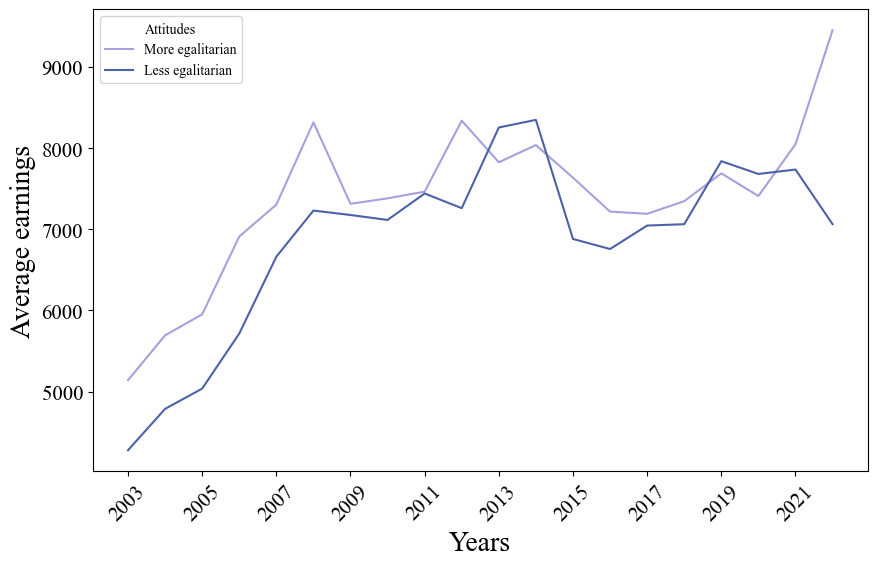

In [169]:
# Пример данных
years = np.arange(2003, 2023)
average_earnings_egalitarian = wages_real_in2003_price_h # Случайные данные для демонстрации
average_earnings_other = wages_real_in2003_price_l  # Случайные данные для демонстрации

# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(10, 6))

# Рисуем линии на графике
ax.plot(years, average_earnings_egalitarian, label='More egalitarian', color='#a6a1dd')
ax.plot(years, average_earnings_other, label='Less egalitarian', color='#4c62a8')

# Настройка заголовков осей и графика
#ax.set_title('Пример графика', fontsize=20, fontname="Times New Roman")
ax.set_xlabel('Years', fontsize=20, fontname="Times New Roman")
ax.set_ylabel('Average earnings', fontsize=20, fontname="Times New Roman")

# Настройка легенды
legend = ax.legend(title='Attitudes', fontsize=10, title_fontsize='10', frameon=True)

# Настройка шрифтов меток на осях
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

# Настройка меток оси X
xticks = np.arange(2003, 2023, 2)
ax.set_xticks(xticks)
ax.set_xticklabels([str(year) for year in xticks], rotation=45)

# Белый фон для графика и всей области
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Увеличиваем шрифт для всей фигуры
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Показать график
plt.show()

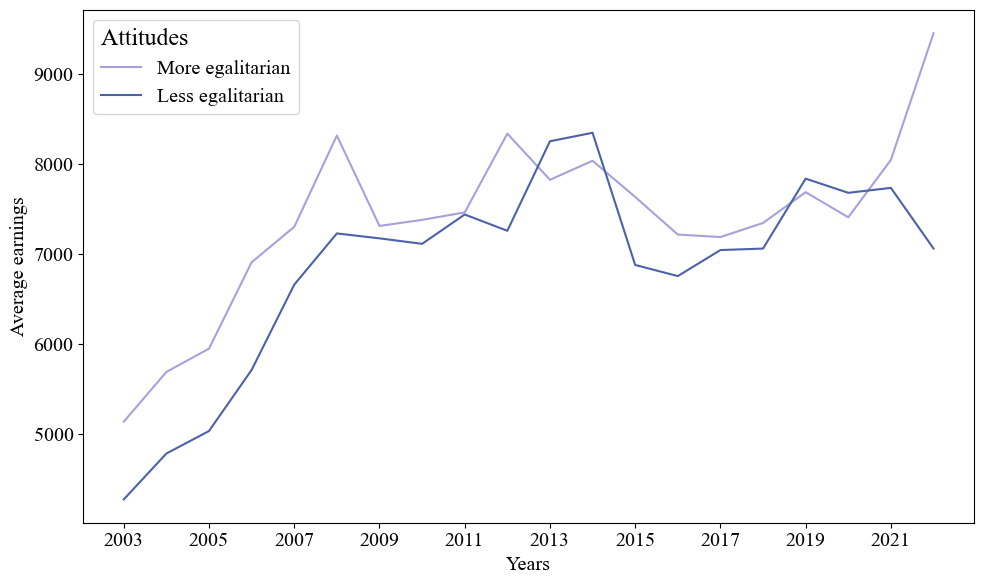

In [170]:
fig, ax = plt.subplots(figsize=(10, 6))

# Рисуем линии на графике
ax.plot(years, average_earnings_egalitarian, label='More egalitarian', color='#a6a1dd')
ax.plot(years, average_earnings_other, label='Less egalitarian', color='#4c62a8')

# Настройка заголовков осей и графика
#ax.set_title('Пример графика', fontweight="bold", fontsize='x-large')
ax.set_xlabel('Years', fontsize='large')
ax.set_ylabel('Average earnings', fontsize='large')

# Настройка легенды
legend = ax.legend(title='Attitudes                 ', fontsize='large', title_fontsize='x-large', frameon=True)

# Настройка шрифтов меток на осях
ax.xaxis.set_tick_params(labelsize='large')
ax.yaxis.set_tick_params(labelsize='large')

# Настройка меток оси X через два года
xticks = np.arange(2003, 2023, 2)
ax.set_xticks(xticks)

# Вывести график в удобном формате
plt.tight_layout()  # Убедитесь, что элементы графика не перекрываются
plt.show()